### Multi-class classification

참고 커널 : https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

빈곤 수준 예측

한 가정이 가지고 있는 140여 개의 속성을 기반으로 그 가정이 가난한 가정인지 부유한 가정인지 판단하는 대회

**Target**
- 1 = extreme poverty 
- 2 = moderate poverty 
- 3 = vulnerable households 
- 4 = non vulnerable households

알아 둘 것)

한 가구의 모든 구성원은 교육 데이터에서 동일한 라벨을 가져야 하지만, 동일한 가구의 개인이 다른 라벨을 가지는 오류가 있다.

==> 이러한 경우, 각 가구의 가장에 대해parentesco1 == 1.0이 있는 행으로 식별할 수 있다.

**Roadmap**
1. **Understand** the problem (we're almost there already)
2. **E**xploratory **D**ata **A**nalysis
3. **Feature engineering** to create a dataset for machine learning
4. Compare several **baseline** machine learning models
5. Try more **complex** machine learning models
6. **Optimize** the selected model
7. Investigate model **predictions** in context of problem
8. Draw **conclusions** and lay out next steps

In [212]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

# 1. 데이터 확인

In [213]:
pd.options.display.max_columns = 150

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

- Id : a unique identifier for each row.
- Target : the target is an ordinal variable indicating groups of income levels.
  - 1 = extreme poverty
  - 2 = moderate poverty
  - 3 = vulnerable households
  - 4 = non vulnerable households
- idhogar : this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.
- parentesco1 : 가장인지 여부
- v2a1 : 월세
- hacdor :  =1 침실로 혼잡함
- rooms : 방의 수
- hacapo : =1 방으로 혼잡함
- v14a :  =1 화장실 있음
- refrig :  =1 냉장고가 있는 경우
- v18q :  owns a tablet
- v18q1 :  number of tablets household owns
- r4h1 : Males younger than 12 years of age
- r4h2 : Males 12 years of age and older
- r4h3 :  Total males in the household
- r4m1 : Females younger than 12 years of age
- r4m2 : Females 12 years of age and older
- r4m3, Total females in the household
- r4t1, persons younger than 12 years of age
- r4t2, persons 12 years of age and older
- r4t3, Total persons in the household
- tamhog, size of the household
- tamviv, number of persons living in the household
- escolari, years of schooling
- rez_esc, Years behind in school
- hhsize, household size
- paredblolad, =1 if predominant material on the outside wall is block or brick
- paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto"
- paredpreb, =1 if predominant material on the outside wall is prefabricated or cement
- pareddes, =1 if predominant material on the outside wall is waste material
- paredmad, =1 if predominant material on the outside wall is wood
- paredzinc, =1 if predominant material on the outside wall is zink
- paredfibras, =1 if predominant material on the outside wall is natural fibers
- paredother, =1 if predominant material on the outside wall is other
- pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo"
- pisocemento, =1 if predominant material on the floor is cement
- pisoother, =1 if predominant material on the floor is other
- pisonatur, =1 if predominant material on the floor is  natural material
- pisonotiene, =1 if no floor at the household
- pisomadera, =1 if predominant material on the floor is wood
- techozinc, =1 if predominant material on the roof is metal foil or zink
- techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine "
- techocane, =1 if predominant material on the roof is natural fibers
- techootro, =1 if predominant material on the roof is other
- cielorazo, =1 if the house has ceiling
- abastaguadentro, =1 if water provision inside the dwelling
- abastaguafuera, =1 if water provision outside the dwelling
- abastaguano, =1 if no water provision
- public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC"
- planpri, =1 electricity from private plant
- noelec, =1 no electricity in the dwelling
- coopele, =1 electricity from cooperative
- sanitario1, =1 no toilet in the dwelling
- sanitario2, =1 toilet connected to sewer or cesspool
- sanitario3, =1 toilet connected to  septic tank
- sanitario5, =1 toilet connected to black hole or letrine
- sanitario6, =1 toilet connected to other system
- energcocinar1, =1 no main source of energy used for cooking (no kitchen)
- energcocinar2, =1 main source of energy used for cooking electricity
- energcocinar3, =1 main source of energy used for cooking gas
- energcocinar4, =1 main source of energy used for cooking wood charcoal
- elimbasu1, =1 if rubbish disposal mainly by tanker truck
- elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried
- elimbasu3, =1 if rubbish disposal mainly by burning
- elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space
- elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea"
- elimbasu6, =1 if rubbish disposal mainly other
- epared1, =1 if walls are bad
- epared2, =1 if walls are regular
- epared3, =1 if walls are good
- etecho1, =1 if roof are bad
- etecho2, =1 if roof are regular
- etecho3, =1 if roof are good
- eviv1, =1 if floor are bad
- eviv2, =1 if floor are regular
- eviv3, =1 if floor are good
- dis, =1 if disable person
- male, =1 if male
- female, =1 if female
- estadocivil1, =1 if less than 10 years old
- estadocivil2, =1 if free or coupled uunion
- estadocivil3, =1 if married
- estadocivil4, =1 if divorced
- estadocivil5, =1 if separated
- estadocivil6, =1 if widow/er
- estadocivil7, =1 if single
- parentesco1, =1 if household head
- parentesco2, =1 if spouse/partner
- parentesco3, =1 if son/doughter
- parentesco4, =1 if stepson/doughter
- parentesco5, =1 if son/doughter in law
- parentesco6, =1 if grandson/doughter
- parentesco7, =1 if mother/father
- parentesco8, =1 if father/mother in law
- parentesco9, =1 if brother/sister
- parentesco10, =1 if brother/sister in law
- parentesco11, =1 if other family member
- parentesco12, =1 if other non family member
- idhogar, Household level identifier
- hogar_nin, Number of children 0 to 19 in household
- hogar_adul, Number of adults in household
- hogar_mayor, # of individuals 65+ in the household
- hogar_total, # of total individuals in the household
- dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- meaneduc,average years of education for adults (18+)
- instlevel1, =1 no level of education
- instlevel2, =1 incomplete primary
- instlevel3, =1 complete primary
- instlevel4, =1 incomplete academic secondary level
- instlevel5, =1 complete academic secondary level
- instlevel6, =1 incomplete technical secondary level
- instlevel7, =1 complete technical secondary level
- instlevel8, =1 undergraduate and higher education
- instlevel9, =1 postgraduate higher education
- bedrooms, number of bedrooms
- overcrowding, # persons per room
- tipovivi1, =1 own and fully paid house
- tipovivi2, "=1 own,  paying in installments"
- tipovivi3, =1 rented
- tipovivi4, =1 precarious
- tipovivi5, "=1 other(assigned,  borrowed)"
- computer, =1 if the household has notebook or desktop computer
- television, =1 if the household has TV
- mobilephone, =1 if mobile phone
- qmobilephone, # of mobile phones
- lugar1, =1 region Central
- lugar2, =1 region Chorotega
- lugar3, =1 region PacÃƒÂ­fico central
- lugar4, =1 region Brunca
- lugar5, =1 region Huetar AtlÃƒÂ¡ntica
- lugar6, =1 region Huetar Norte
- area1, =1 zona urbana
- area2, =2 zona rural
- age, Age in years
- SQBescolari, escolari squared
- SQBage, age squared
- SQBhogar_total, hogar_total squared
- SQBedjefe, edjefe squared
- SQBhogar_nin, hogar_nin squared
- SQBovercrowding, overcrowding squared
- SQBdependency, dependency squared
- SQBmeaned, square of the mean years of education of adults (>=18) in the household
- agesq, Age squared

In [214]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [215]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [216]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

## 1) Integer Columns

In [217]:
train.select_dtypes('int64').head()

hacdor  rooms  hacapo  v14a  refrig  v18q  r4h1  r4h2  r4h3  r4m1  r4m2  \
0       0      3       0     1       1     0     0     1     1     0     0   
1       0      4       0     1       1     1     0     1     1     0     0   
2       0      8       0     1       1     0     0     0     0     0     1   
3       0      5       0     1       1     1     0     2     2     1     1   
4       0      5       0     1       1     1     0     2     2     1     1   

   r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  escolari  hhsize  paredblolad  \
0     0     0     1     1       1       1        10       1            1   
1     0     0     1     1       1       1        12       1            0   
2     1     0     1     1       1       1        11       1            0   
3     2     1     3     4       4       4         9       4            1   
4     2     1     3     4       4       4        11       4            1   

   paredzocalo  paredpreb  pareddes  paredmad  paredzinc  paredfibras  \
0            0          0         0         0          0            0   
1            0          0         0         1          0            0   
2            0          0         0         1          0            0   
3            0          0         0         0          0            0   
4            0          0         0         0          0            0   

   paredother  pisomoscer  pisocemento  pisoother  pisonatur  pisonotiene  \
0           0           1            0          0          0            0   
1           0           0            0          0          0            0   
2           0           1            0          0          0            0   
3           0           1            0          0          0            0   
4           0           1            0          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
0                1               0            0       1        0       0   
1                1               0            0       1        0       0   
2                1               0            0       1        0       0   
3                1               0            0       1        0       0   
4                1               0            0       1        0       0   

   coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
0        0           0           1           0           0           0   
1        0           0           1           0           0           0   
2        0           0           1           0           0           0   
3        0           0           1           0           0           0   
4        0           0           1           0           0           0   

   energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
0              0              0              1              0          1   
1              0              1              0              0          1   
2              0              1              0              0          1   
3              0              1              0              0          1   
4              0              1              0              0          1   

   elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  \
0          0          0          0          0          0        0        1   
1          0          0          0          0          0        0        1   
2          0          0          0          0          0        0        1   
3          0          0          0       

In [218]:
for i, col in enumerate(train.select_dtypes('int64')):
    print(col)

hacdor
rooms
hacapo
v14a
refrig
v18q
r4h1
r4h2
r4h3
r4m1
r4m2
r4m3
r4t1
r4t2
r4t3
tamhog
tamviv
escolari
hhsize
paredblolad
paredzocalo
paredpreb
pareddes
paredmad
paredzinc
paredfibras
paredother
pisomoscer
pisocemento
pisoother
pisonatur
pisonotiene
pisomadera
techozinc
techoentrepiso
techocane
techootro
cielorazo
abastaguadentro
abastaguafuera
abastaguano
public
planpri
noelec
coopele
sanitario1
sanitario2
sanitario3
sanitario5
sanitario6
energcocinar1
energcocinar2
energcocinar3
energcocinar4
elimbasu1
elimbasu2
elimbasu3
elimbasu4
elimbasu5
elimbasu6
epared1
epared2
epared3
etecho1
etecho2
etecho3
eviv1
eviv2
eviv3
dis
male
female
estadocivil1
estadocivil2
estadocivil3
estadocivil4
estadocivil5
estadocivil6
estadocivil7
parentesco1
parentesco2
parentesco3
parentesco4
parentesco5
parentesco6
parentesco7
parentesco8
parentesco9
parentesco10
parentesco11
parentesco12
hogar_nin
hogar_adul
hogar_mayor
hogar_total
instlevel1
instlevel2
instlevel3
instlevel4
instlevel5
instlevel6
instlev

In [219]:
train.select_dtypes(np.int64).nunique()

hacdor             2
rooms             11
hacapo             2
v14a               2
refrig             2
                  ..
SQBhogar_total    13
SQBedjefe         22
SQBhogar_nin      10
agesq             97
Target             4
Length: 130, dtype: int64

In [220]:
train.select_dtypes(np.int64).nunique().value_counts()

2     101
13      5
97      3
22      3
11      3
10      3
9       3
7       3
6       2
4       2
14      1
1       1
dtype: int64

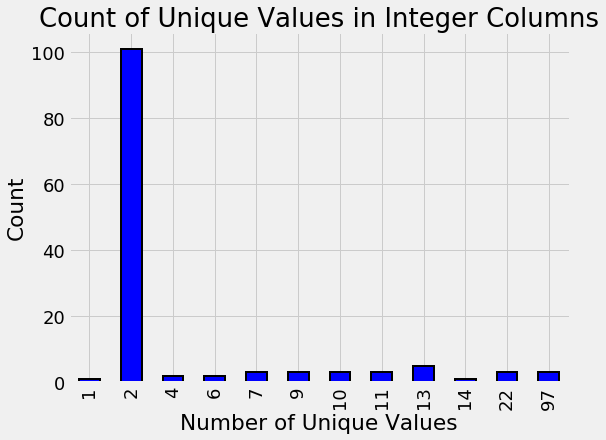

In [221]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue',figsize = (8, 6),
                                                                             edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

> Booleans (0 or 1) 변수가 가장 많음

## 2) Float Columns

In [222]:
train.select_dtypes('float').head()

v2a1  v18q1  rez_esc  meaneduc  overcrowding  SQBovercrowding  \
0  190000.0    NaN      NaN      10.0      1.000000         1.000000   
1  135000.0    1.0      NaN      12.0      1.000000         1.000000   
2       NaN    NaN      NaN      11.0      0.500000         0.250000   
3  180000.0    1.0      1.0      11.0      1.333333         1.777778   
4  180000.0    1.0      NaN      11.0      1.333333         1.777778   

   SQBdependency  SQBmeaned  
0            0.0      100.0  
1           64.0      144.0  
2           64.0      121.0  
3            1.0      121.0  
4            1.0      121.0

In [223]:
for i, col in enumerate(train.select_dtypes('float')):
    print(col)

v2a1
v18q1
rez_esc
meaneduc
overcrowding
SQBovercrowding
SQBdependency
SQBmeaned


In [224]:
from collections import OrderedDict
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
colors.items()

odict_items([(1, 'red'), (2, 'orange'), (3, 'blue'), (4, 'green')])

**OrderedDict** : 일반 dictionary랑 달리 키와 값을 동일한 순서로 유지하므로 빈곤 수준을 색상에 매핑할 수 있음

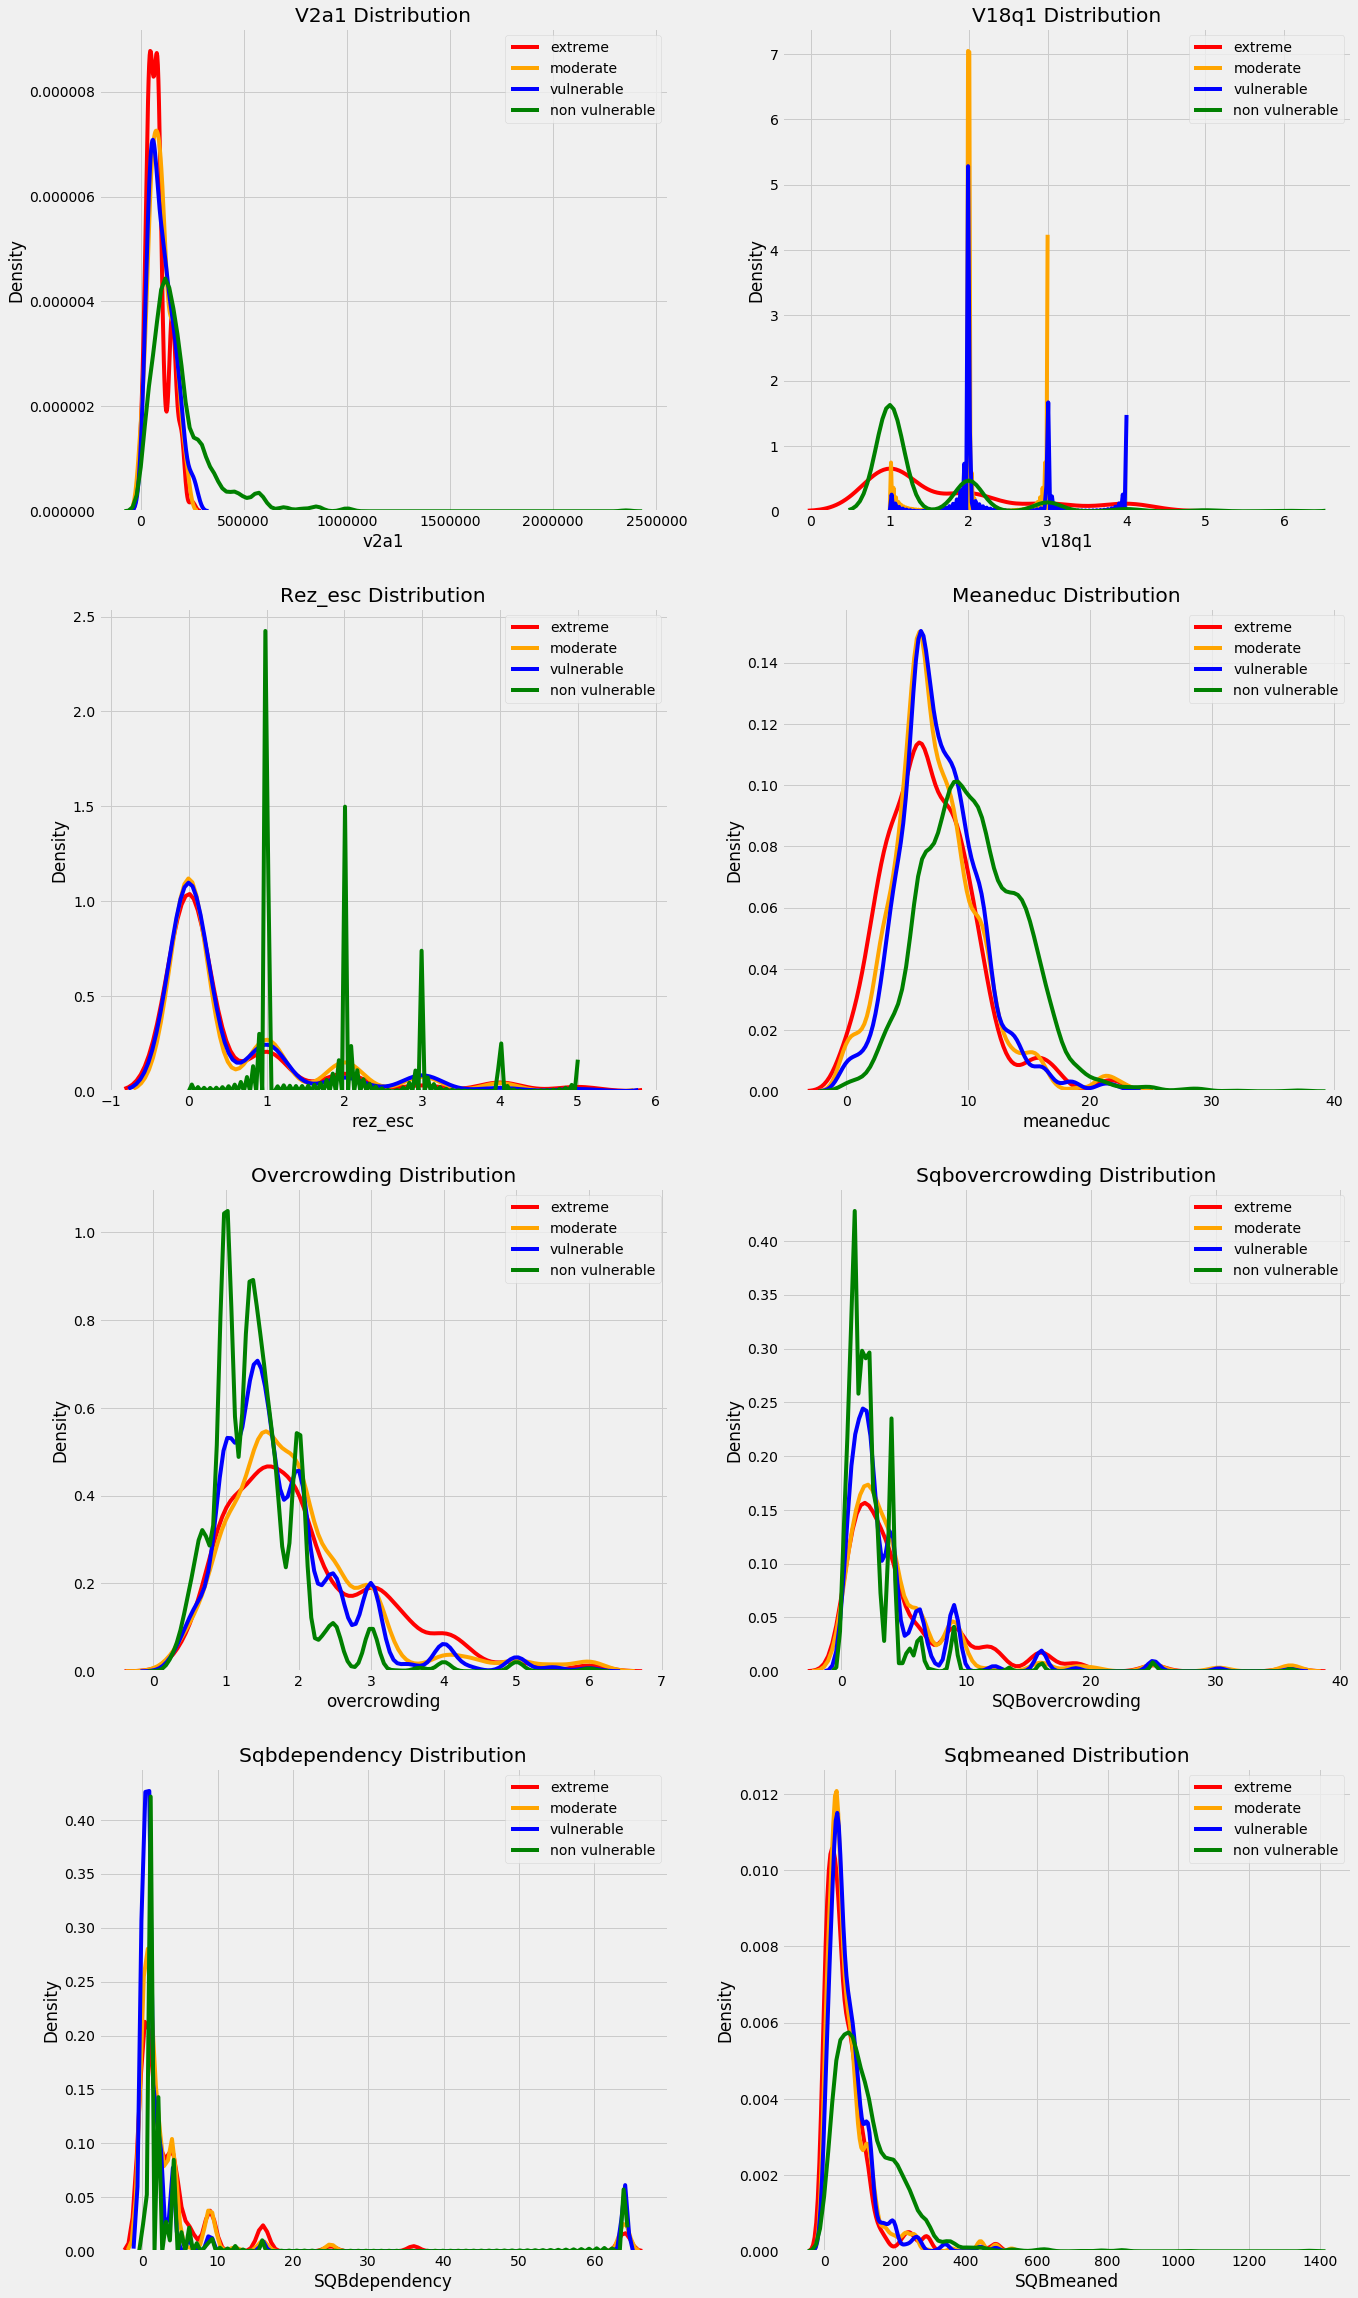

In [225]:
from collections import OrderedDict

plt.figure( figsize = (20,16))
plt.style.use('fivethirtyeight')

colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4,2,i+1)
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)        

> - 'meaneduc'(average years of education for adults):  성인 교육의 평균이 높을 수록 빈곤수준이 낮다.

## 3) Object Columns
- **dependency** : Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
- **edjefe** : years of education of **male head** of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
- **edjefa** : years of education of **female head** of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [226]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

In [227]:
train.dependency

0        no
1         8
2         8
3       yes
4       yes
       ... 
9552    .25
9553    .25
9554    .25
9555    .25
9556    .25
Name: dependency, Length: 9557, dtype: object

In [228]:
mapping = {'yes':1, 'no':0}

for df in [train,test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
train[['dependency','edjefa','edjefe']].describe()        

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

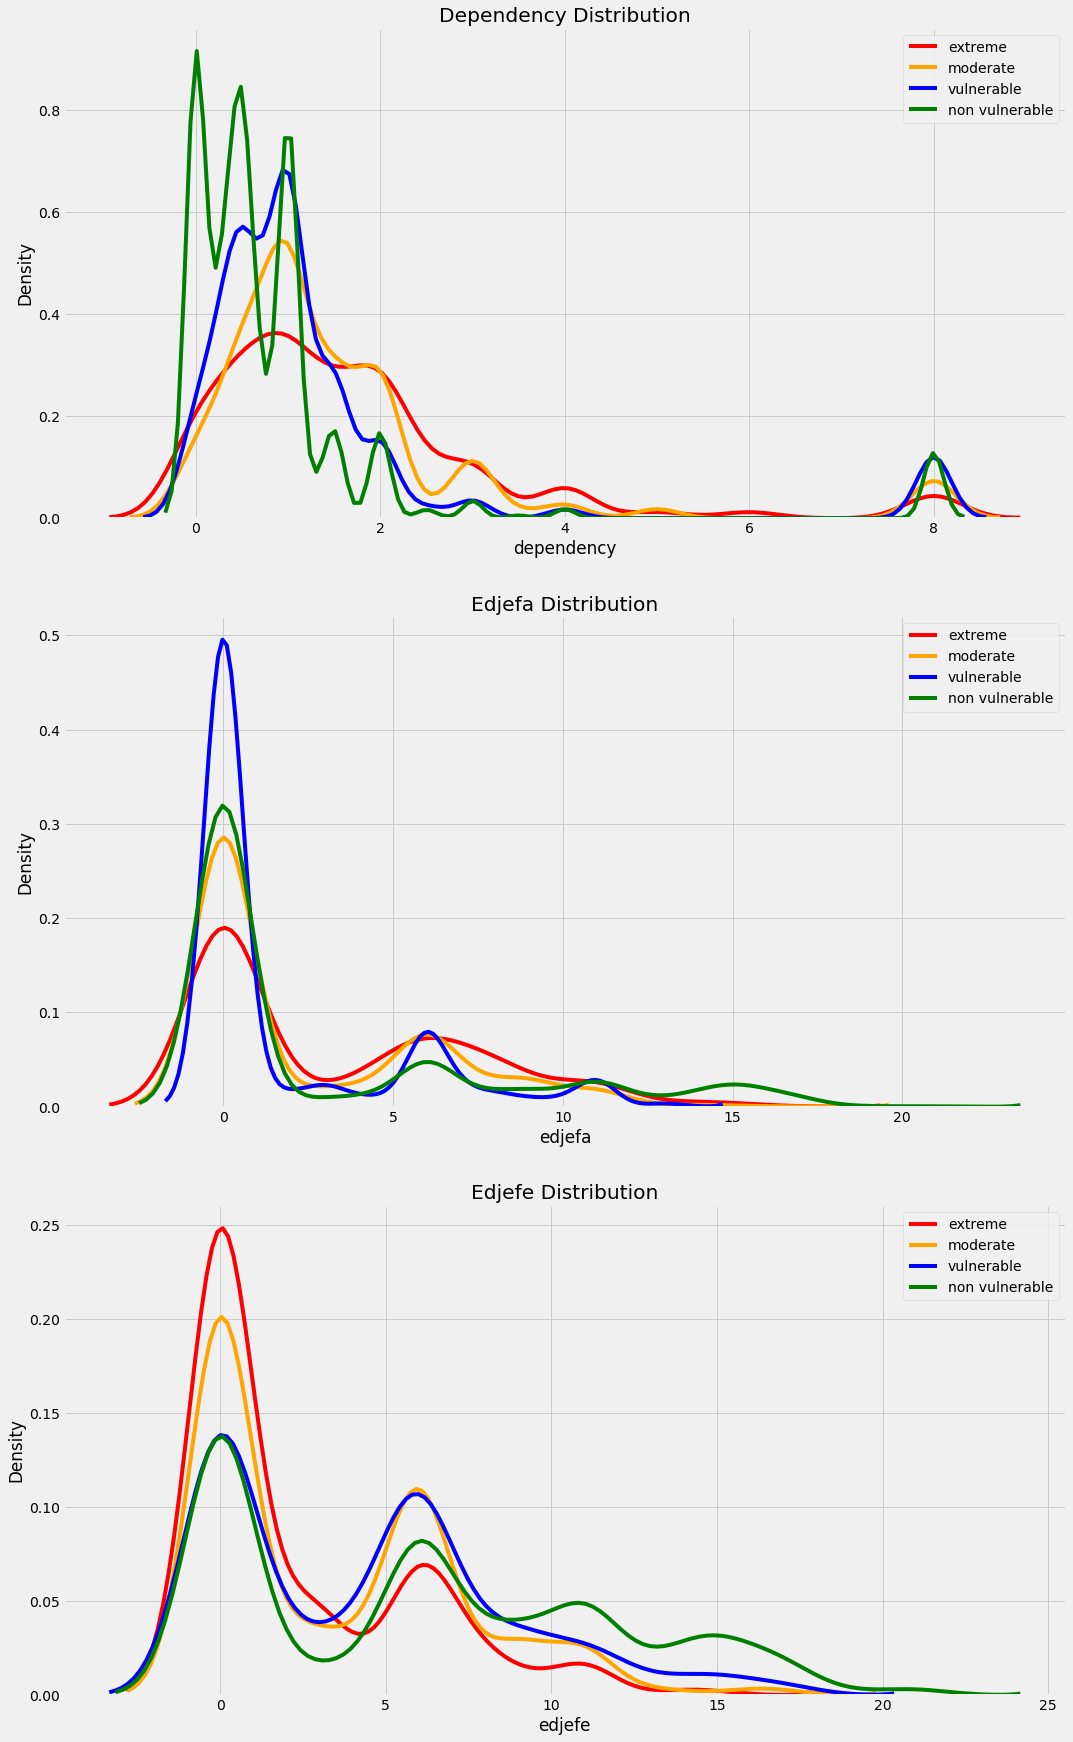

In [229]:
plt.figure(figsize = (16,12))

for i,col in enumerate(['dependency','edjefa','edjefe']):
    ax = plt.subplot(3,1,i+1)
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
plt.subplots_adjust(top = 2)

위와 같은 작업을 좀 더 쉽게 하기 위해, 우리는 훈련과 테스트 데이터 프레임을 함께 사용할 것이다. 피쳐 엔지니어링을 시작하면 두 데이터 프레임에 동일한 작업을 적용하여 동일한 기능을 제공하고자 하기 때문에 이는 매우 중요하다. 나중에 Target을 기준으로 세트를 구분할 수 있다.

In [230]:
# Add null Target column to test
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

# 2. Exploring Label Distribution
: 올바른 labels를 보기 위해, parentesco1 == 1이 각 가구의 올바른 labels인 가장이기 때문에 이 열로 부분집합할 것이다

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

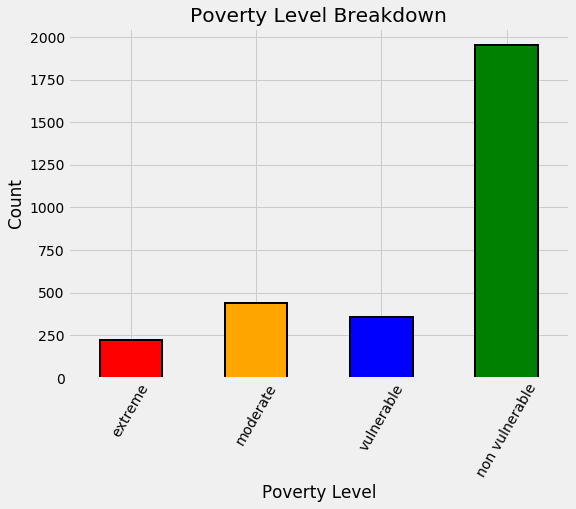

In [231]:
heads = data.loc[data['parentesco1'] == 1].copy()

train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1),['Target','idhogar']]

label_counts = train_labels['Target'].value_counts().sort_index()

label_counts.plot.bar(figsize = (8,6), color = colors.values(), edgecolor = 'k',linewidth = 2)

plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');

label_counts

> - 불균형 클래스임 => 이것은 왜 대회 주최자들이 weighted-F1이 아닌 **macro F1 score**를 측정지표로 선택하는지 생각해 볼 수 있다.
(가중치 주면 non vulnerable열에만 가중치가 많이 들어가 정확한 지표가 나올 수 없기 때문인 것 같다.)
- 다른 범주보다 non vulnerable가 훨씬 많다.
- extreme poverty class가 가장 적다.

==> oversampling으로 해결할 수 있다.

# 3. Addressing Wrong Labels

## 1) Identify Errors
- 같은 가족인데 다른 label을 가지고 있는 가정을 찾기 위해서 

==> 가구별로 데이터를 그룹화한 다음, only one unique value of the Target인지 확인한다.

In [232]:
train['idhogar']

0       21eb7fcc1
1       0e5d7a658
2       2c7317ea8
3       2b58d945f
4       2b58d945f
          ...    
9552    d6c086aa3
9553    d6c086aa3
9554    d6c086aa3
9555    d6c086aa3
9556    d6c086aa3
Name: idhogar, Length: 9557, dtype: object

In [233]:
all_equal = train.groupby('idhogar')['Target']
all_equal.head()

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9165, dtype: int64

In [234]:
all_equal = train.groupby('idhogar')['Target'].nunique()
print(all_equal)

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: Target, Length: 2988, dtype: int64


In [235]:
all_equal = train.groupby('idhogar')['Target'].nunique().value_counts()
print(all_equal)

1    2903
2      84
3       1
Name: Target, dtype: int64


In [236]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)
all_equal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [237]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x : x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [238]:
not_equal.index

Index(['0172ab1d9', '03f4e5f4d', '0511912b6', '078a0b6e2', '09e25d616',
       '0f3e65c83', '0f9494d3a', '15a891635', '17fb04a62', '18832b840',
       '26b3a0f41', '288579c97', '28893b5e7', '2c9872b82', '2cb443214',
       '309fb7246', '30a70901d', '3c6973219', '3c73c107f', '3df651058',
       '3fe29a56b', '410194c8b', '417865404', '42ec8bef5', '43b9c83e5',
       '44f219a16', '46af47063', '4b6077882', '4c2dba109', '4dc11e11f',
       '4e19bd549', '50e064ee8', '513adb616', '54118d5d9', '55a662731',
       '564eab113', '594d3eb27', '5c3f7725d', '5c6f32bbc', '5e9329fc6',
       '614b48fb7', '636330516', '654ef7612', '67ad49822', '6833ac5dc',
       '694a0cbf4', '6a389f3de', '6bcf799cf', '6c543442a', '71cd52a80',
       '73d85d05d', '7ad269eef', '7c57f8237', '7e9d58c5c', '7ea6aca15',
       '80a66379b', '811a35744', '8242a51ec', '8420bcfca', '8ae3e74ca',
       '8bb6da3c1', '932287f5d', '9bbf7c6ca', 'a20ff33ba', 'a3288e6fa',
       'a94a45642', 'bcaa2e2f5', 'bcab69521', 'bd82509d1', 'be91

예를 들어 not_equal.index[0] 이 가정의 경우를 보면 다음과 같다.

In [239]:
not_equal.index[0]

'0172ab1d9'

In [240]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

idhogar  parentesco1  Target
7651  0172ab1d9            0       3
7652  0172ab1d9            0       2
7653  0172ab1d9            0       3
7654  0172ab1d9            1       3
7655  0172ab1d9            0       2

> 올바른 label은 parentesco1 == 1일때라고 했으니까 이 가정의 Target은 3이고 3명이 맞는 label을 가지고 있다.

## 2) Families without Heads of Household

In [241]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()


# 가장 없는 가정 찾기
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [242]:
# 가장 없고 label도 다른 경우 찾기
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


## 3) Correct Errors
: 가장이 있고, 같은 가정에서 다른 Target값을 가진 사람들을 수정할 수 있다.

In [243]:
for household in not_equal.index:
    # 올바른 label 찾기 (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    
    # 모든 가정에 올바른 label 대입하기
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


# 4. Missing Variables

In [244]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

## 1) v18q1 
: Number of tablets

In [245]:
def plot_value_counts(df,col, heads_only=False):
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
    plt.figure(figsize = (8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',edgecolor = 'k',linewidth = 2)
    plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
    plt.show();

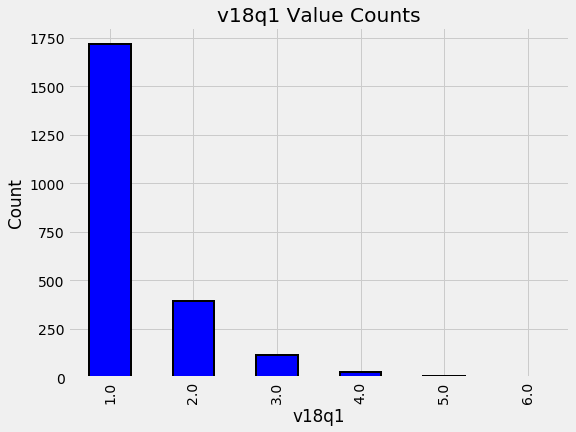

In [246]:
plot_value_counts(heads,'v18q1')

> v18q1 : Number of tablets
- 1이 가장 많음

In [247]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

> 결측값은 즉 tablet이 없다는 것이니까 0으로 채울 수 있다.

In [248]:
data['v18q1'] = data['v18q1'].fillna(0)

## 2) v2a1
: 월세
- **tipovivi_** : 집 보유 여부(ownership/renting status of the home)
 - tipovivi1, =1 own and fully paid house
 - tipovivi2, "=1 own,  paying in installments"
 - tipovivi3, =1 rented
 - tipovivi4, =1 precarious
 - tipovivi5, "=1 other(assigned,  borrowed)"

In [249]:
# 월세 지불이 없는 행
data['v2a1'].isnull()

0        False
1        False
2         True
3        False
4        False
         ...  
33408     True
33409     True
33410     True
33411     True
33412     True
Name: v2a1, Length: 33413, dtype: bool

In [250]:
# # 월세 지불이 없는 행의 집 보유 여부를 확인
own_variables = [x for x in data if x.startswith('tipo')]

data.loc[data['v2a1'].isnull(), own_variables].head()

tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
2           1          0          0          0          0
13          1          0          0          0          0
14          1          0          0          0          0
26          1          0          0          0          0
32          1          0          0          0          0

In [251]:
data.loc[data['v2a1'].isnull(), own_variables].sum()

tipovivi1    20844
tipovivi2        0
tipovivi3        0
tipovivi4      597
tipovivi5     2822
dtype: int64

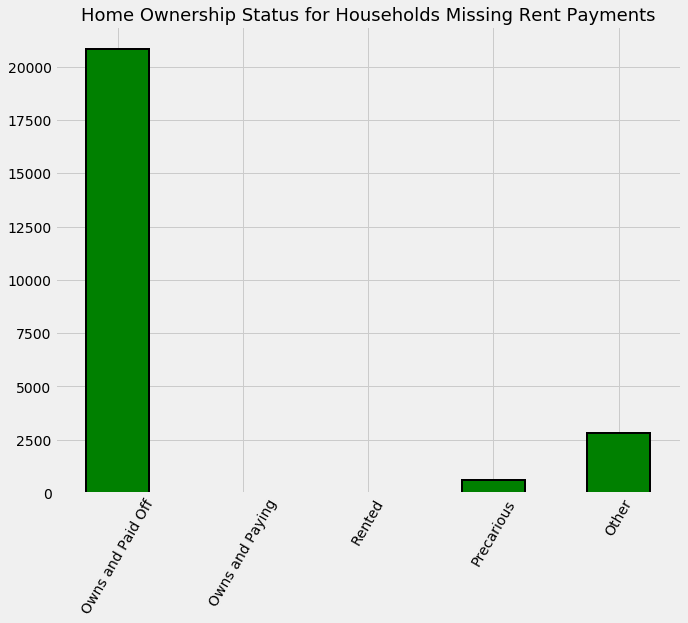

In [252]:
own_variables = [x for x in data if x.startswith('tipo')]

data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8), color = 'green', edgecolor = 'k', linewidth = 2);

plt.xticks([0, 1, 2, 3, 4], ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

> 월세 지불이 없는 가구는 일반적으로 그들 **자신의 집을 소유**하고 있다는 것을 알 수 있다. 

In [253]:
# 소유가 되어 월세 결제가 누락된 주택에 대해서는 임대료 지급액을 0으로 설정
# (Fill in households that own the house with 0 rent payment)
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

# 가정이 missing values를 가지고 있는지에 대한 Boolean열을 추가한다.
# Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

## 3) rez_esc
: years behind in school

- Null 값을 가진 가족에게는 현재 학교에 다니는 자녀가 없을 수 있다.
- Null 값이 있는 사람들의 나이와 Null 값이 없는 사람들의 나이를 찾아 비교해보자

In [254]:
# notnull() 메소드는 관측치가 결측이면 False, 결측이 아니면 True를 반환함

# Null 값이 없는 사람들(학교에 다니는 사람들)의 나이
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

> - Null 값이 없는 사람들의 나이 중 가장 많은 나이는 17살이다.
- 17살 보다 나이가 많으면 그들은 학교에 다니지 않는다고 가정할 수 있다.

- Null 값이 있는 사람들의 나이를 보자

In [255]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

>(19세 이상이고 누락된 값이 있음) or (7세 미만이고 누락된 값이 있음) => 0으로 설정할 수 있다.

In [256]:
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# 가정이 missing values를 가지고 있는지에 대한 Boolean열을 추가한다.
# Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

이상치 탐지

In [257]:
data.rez_esc.value_counts()

0.0     30894
1.0       728
2.0       336
3.0       174
4.0        80
5.0        39
99.0        1
Name: rez_esc, dtype: int64

> one outlier(99) => 최대값이 5이므로 5를 초과하는 값은 5로 설정해야 한다.

In [258]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

### Plot Two Categorical Variables
: 두 범주형 변수의 상관관계를 보여주기 위해서 scatterplots, faceted bar plots, boxplots 등을 쓸 수 있지만 새로 만들었다.
- **점의 크기** :  각 x 값의 y 값 백분율을 나타낸다.

In [259]:
def plot_categoricals(x, y, data, annotate = True):
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
   
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

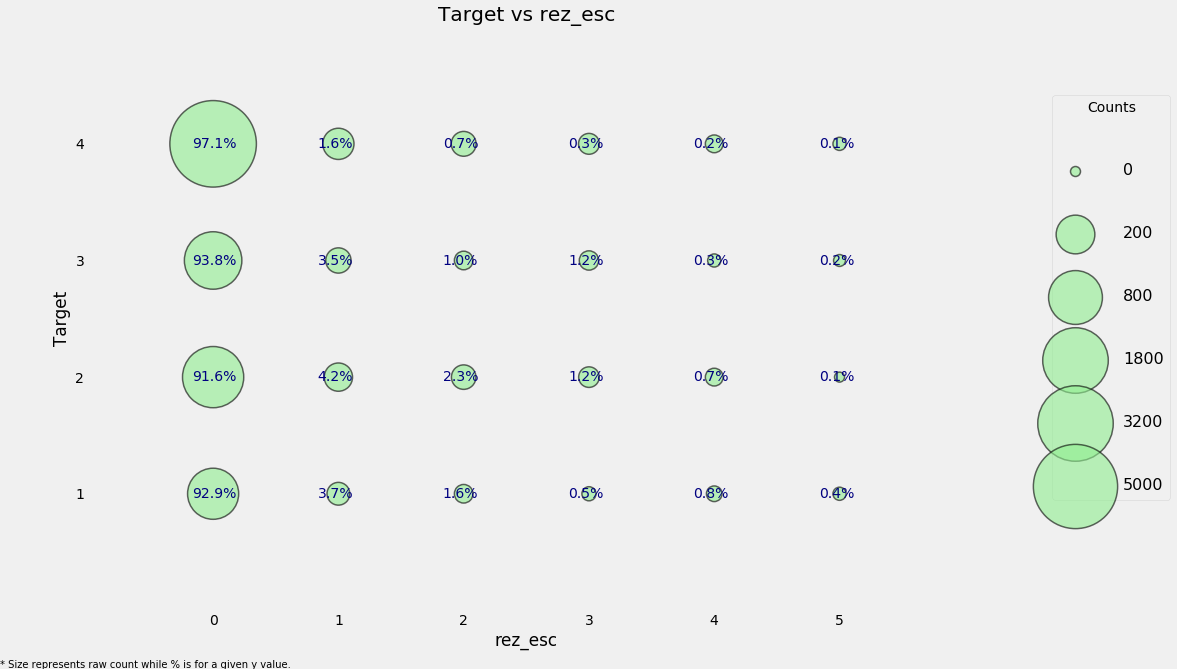

In [260]:
plot_categoricals('rez_esc', 'Target', data);

> - markers의 크기 : raw count를 의미
- 그림을 읽으려면 지정된 y 값을 선택한 다음 행을 가로질러 읽는 것이다.
- Target=1이면, rez_esc=0인 사람은 대략 800명이고, 0.4%는 rez_esc=5인 사람들이다.
- 이 그림은 전체 수와 범주 내 비율 모두를 보여주려고 한다. 

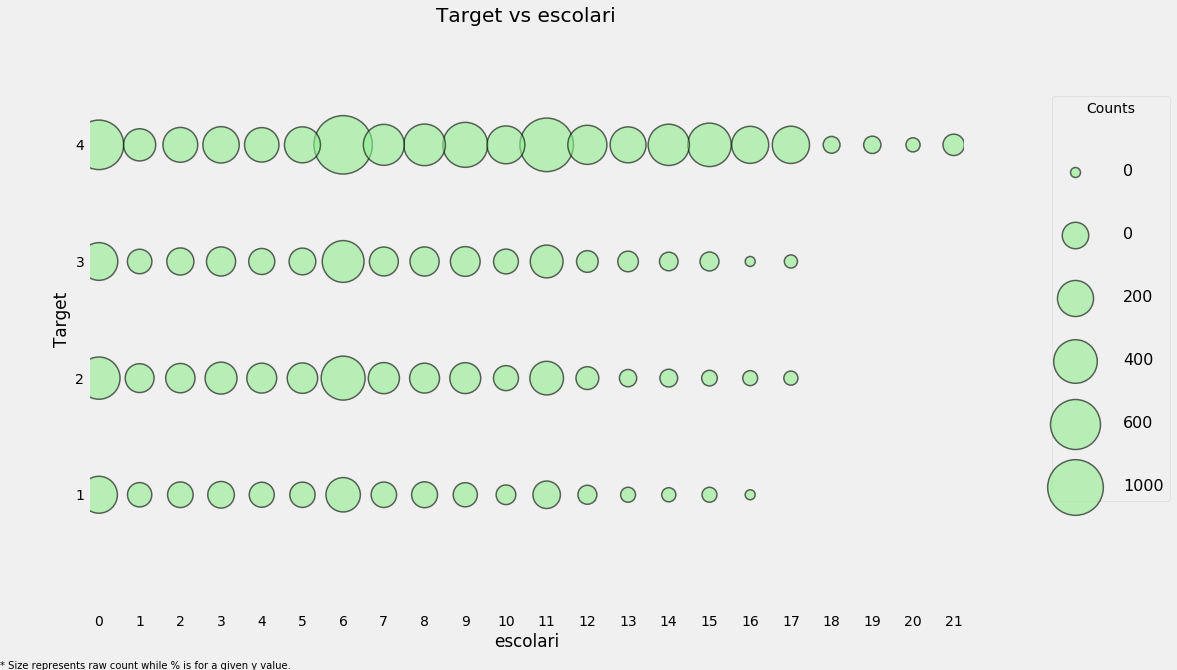

In [261]:
plot_categoricals('escolari', 'Target', data, annotate = False)

In [262]:
data['rez_esc-missing']

0        False
1        False
2        False
3        False
4        False
         ...  
33408    False
33409    False
33410    False
33411    False
33412    False
Name: rez_esc-missing, Length: 33413, dtype: bool

'== 1 이거 왜 쓰는가??'
- True : 1
- False : 0
을 의미하기 때문에 여기서는 결측값이 있는 것에 대한 데이터 보기?

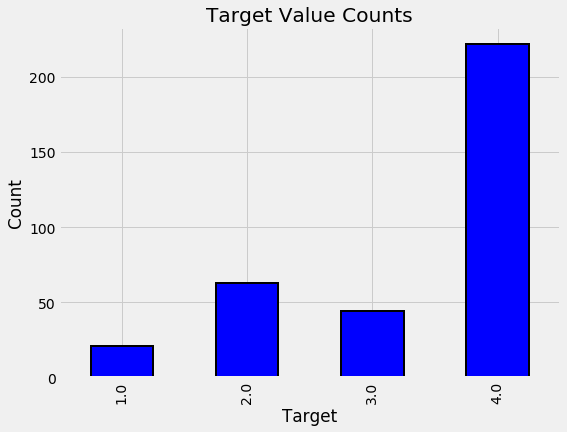

In [263]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')   

In [264]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 'Target')

> sometimes the **missing information** is just as **important** as the information you are given.

# 5. Feature Engineering

### process
1. 변수를 household level 과 invididual level로 나누기
2. individual level data에 적합한 집계 찾기
  - (Ordinal variables)순서형 변수 => 통계 집계를 사용할 수 있음
  - (Boolean variables) => 집계할 수 있지만 통계량이 적음
3. household level data에 individual 합치기 

###  Column Definitions

1. **Individual Variables** : these are characteristics of each individual rather than the household
  - Boolean: Yes or No (0 or 1)
  - Ordered Discrete: Integers with an ordering

2. **Household variables**
  - Boolean: Yes or No
  - Ordered Discrete: Integers with an ordering
  - Continuous numeric

3. **Squared Variables** : derived from squaring variables in the data 

4. **Id variables** : identifies the data and should not be used as features


In [265]:
id_ = ['Id', 'idhogar', 'Target']

In [266]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [267]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [268]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [269]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


## 1) Squared Variables
SQBage vs age

In [270]:
sns.lmplot('age', 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

> SQBage ,age =>  이 두 변수들은 높은 상관관계를 가짐.두 변수 모두 있을 필요 없음

In [271]:
# squared variables 제거
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

## 2) Id Variables

그대로 둔다.

## 3) Household Variables*

In [272]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

### 3_1) 중복된 Household Variables 처리 및 새로운 열 생성

In [273]:
# correlation matrix 만들고
corr_matrix = heads.corr()

# 상삼각행렬 선택하고
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관계수가 0.95보다 큰 index 찾기
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

> 이것들은 각 쌍의 상관 변수 중 하나를 보여준다. 다른 쌍을 찾기 위해 corr_matrix를 subset할 수 있다.

**tamhog**

In [274]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

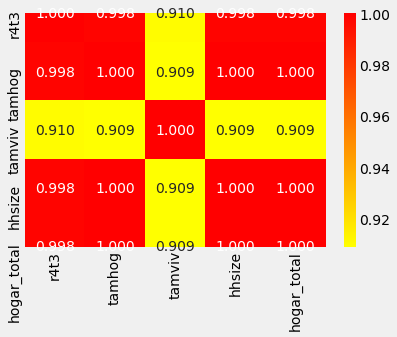

In [275]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

- r4t3 : Total persons in the household
- tamhog : size of the household
- tamviv : number of persons living in the household
- hhsize : household size
- hogar_total : of total individuals in the household

==> 이 변수들은 서로 높은 상관관계를 가짐
   - 특히, hhsize랑 tamhog, hogar_total, r4t3가 같음 => 제거
   - tamviv는 hhsize랑 완전 같지는 않음(아마 가족 중에 그 집에 살지 않는 사람이 있을 것이기 때문에)
   
     ==> 이 차이를 scatterplot으로 그려보자

In [276]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

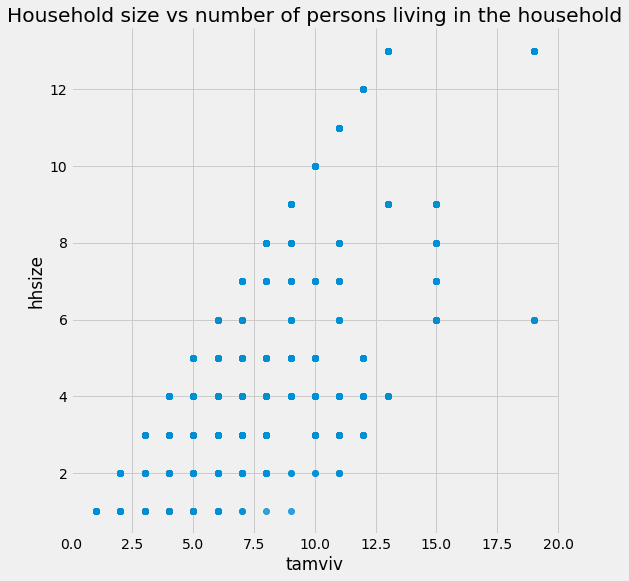

In [277]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size = 8);
plt.title('Household size vs number of persons living in the household');

> 가족 수보다 집에 사는 사람이 더 많다.(there are more people living in the household than there are in the family)

> ==> new feature: 이 2변수의 차이로 새로운 변수 만들기

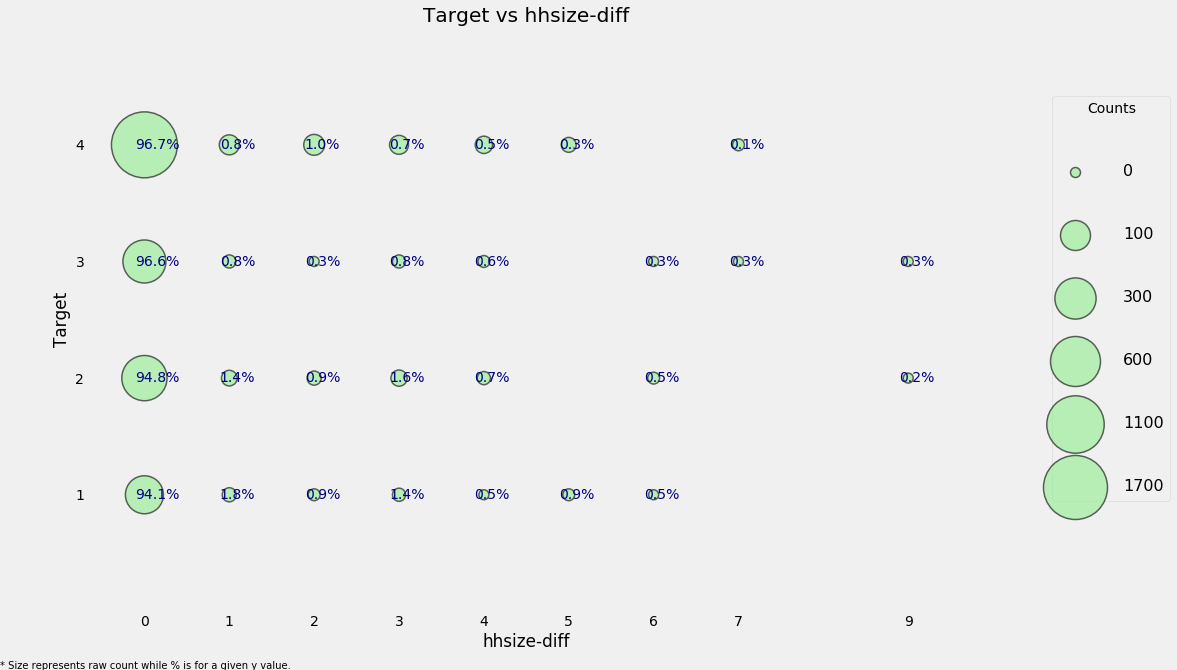

In [278]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

**coopele** 가정의 전기가 어디에서 오는지

:=1 electricity from cooperative

- public : =1 electricity from CNFL, ICE, ESPH/JASEC
- planpri : =1 electricity from private plant
- noelec : =1 no electricity in the dwelling
- coopele :  =1 electricity from cooperative

In [279]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

**Creating Ordinal Variable**
  - 0: No electricity
  - 1: Electricity from cooperative
  - 2: Electricity from CNFL, ICA, ESPH/JASEC
  - 3: Electricity from private plant

In [280]:
elec = []

for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)  # 협력기관
    elif row['public'] == 1:
        elec.append(2)   #공공기관
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

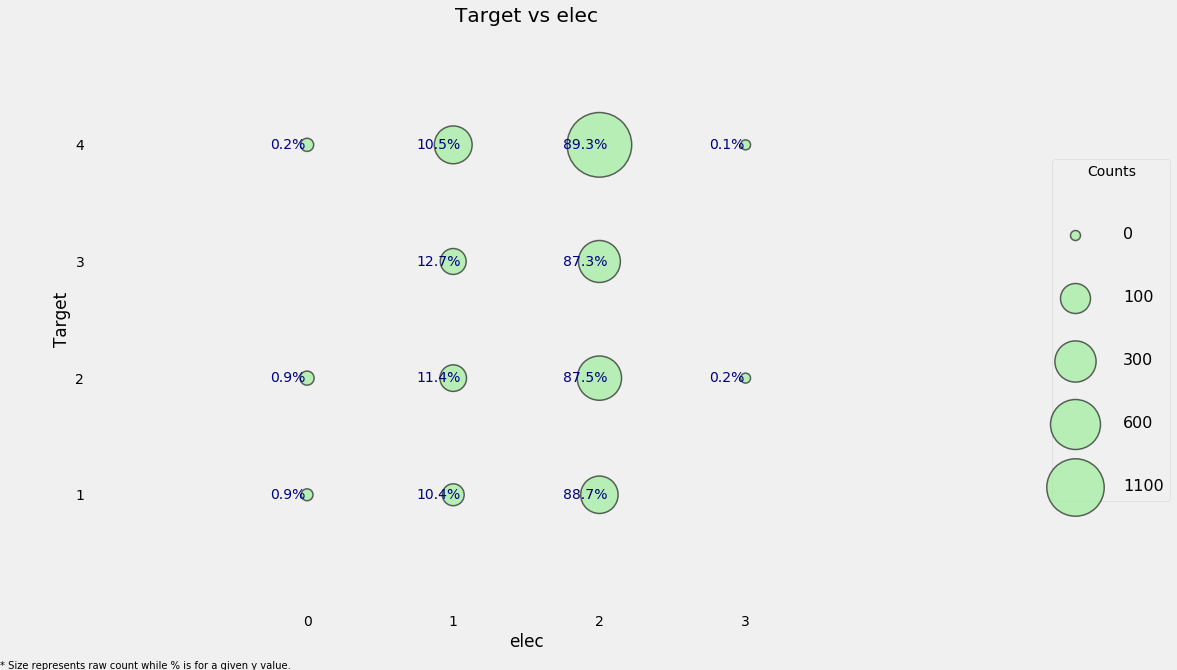

In [281]:
plot_categoricals('elec', 'Target', heads)

> the most common source of electricity is from one of the listed providers

**area2**

: house is in a rural zone

==> 집이 도시에 있다는 열(area1)과 중복되니까 제거한다.

- area1 : =1 zona urbana
- area2 : =2 zona rural

In [282]:
heads = heads.drop(columns = 'area2')

heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

> 도시지역 가정(1)은 농촌지역 가정(0)보다 빈곤수준이 낮을 것이다.

**Creating Ordinal Variables**

walls, roof, and floor에 대해서 'bad','regular','good' 이렇게 있다.

=> 이것을 bad < regular < good 로 Ordinal Variables로 만들자
- epared1 : =1 if walls are bad
- epared2 : =1 if walls are regular
- epared3 : =1 if walls are good
- etecho1 : =1 if roof are bad
- etecho2 : =1 if roof are regular
- etecho3 : =1 if roof are good
- eviv1 : =1 if floor are bad
- eviv2 : =1 if floor are regular
- eviv3 : =1 if floor are good

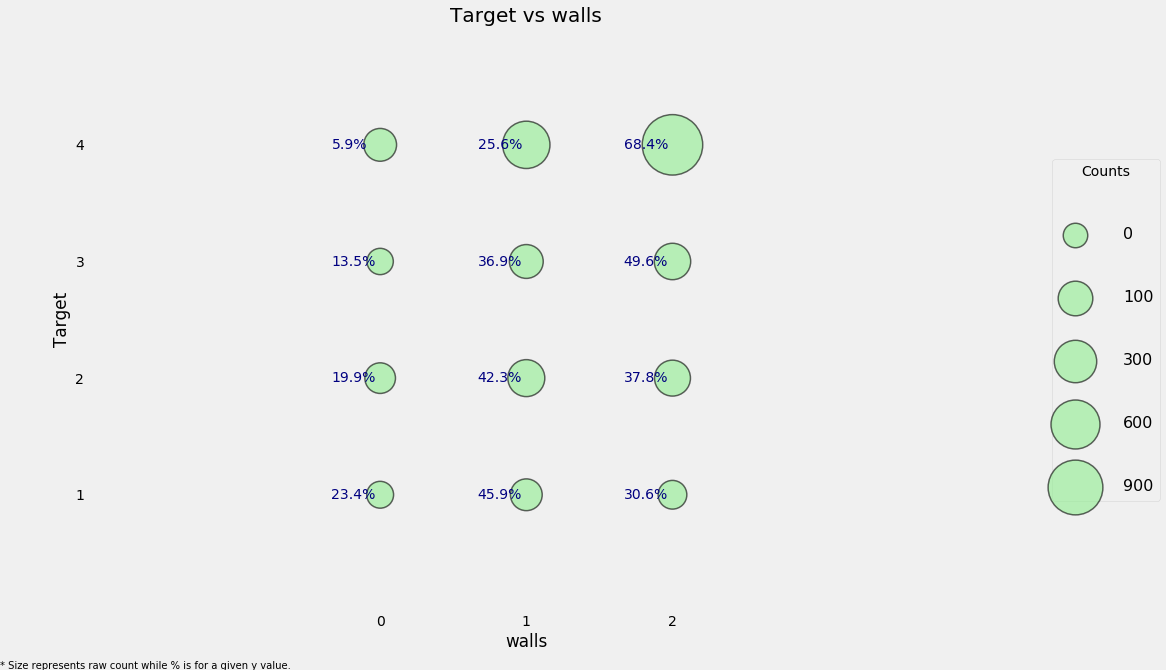

In [283]:
# np.argmax를 사용하여 각 가정에 대해 0이 아닌 열을 찾는다.
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis = 1)

# heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])
plot_categoricals('walls', 'Target', heads)

In [284]:
# roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis = 1)
# heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])


**Feature Construction**

우리는 집의 구조물의 질에 대한 전반적인 측정을 얻기 위해 방금 전에 만든 세 가지 특징('walls','roof','floor')을 합칠 수 있다.

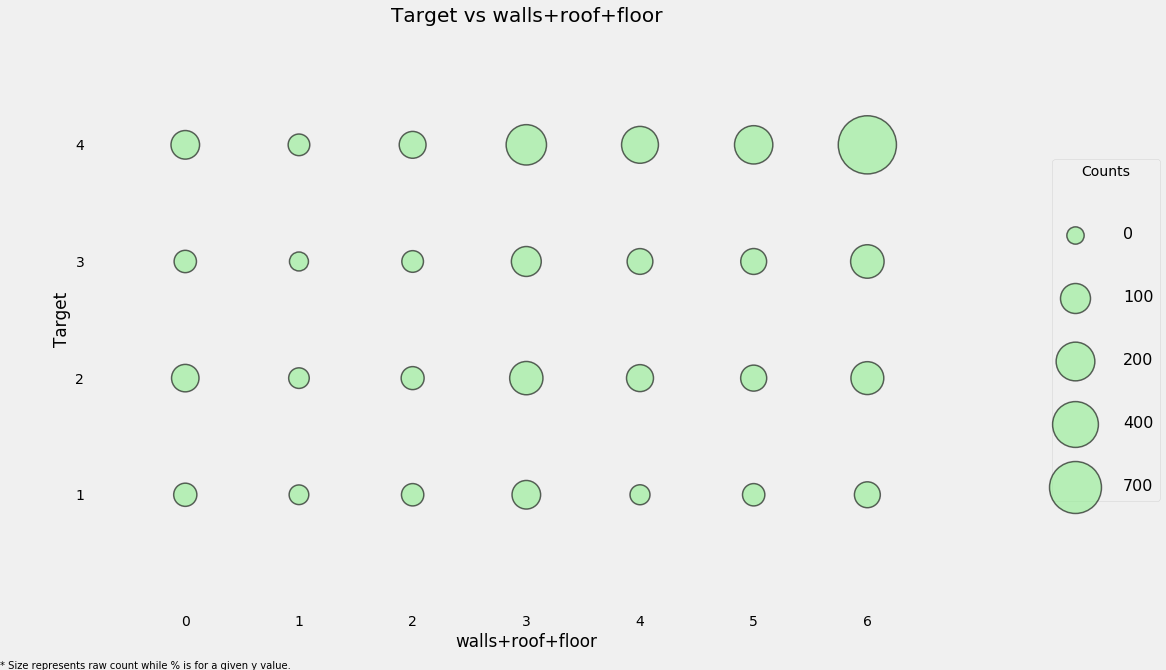

In [285]:
# Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

In [286]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head()

walls+roof+floor  Target  Normalized Count
0                 0     4.0          0.376404
1                 0     2.0          0.320225
2                 0     1.0          0.162921
3                 0     3.0          0.140449
4                 1     4.0          0.323529

**warning**

: negative value, with -1 point each for no toilet, electricity, floor, water service, and ceiling

In [287]:
# No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

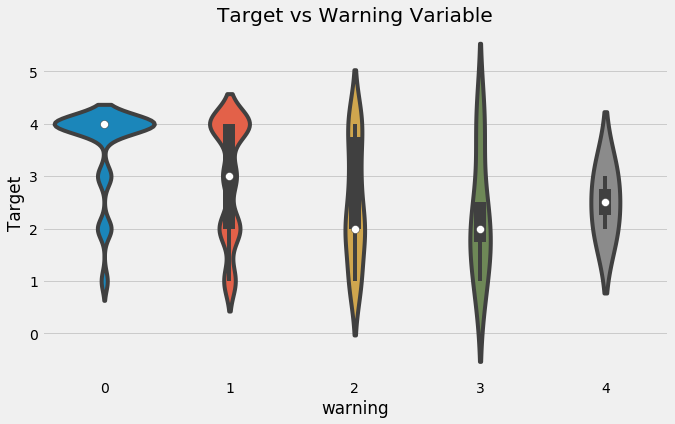

In [288]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y = 'Target', data = heads);
plt.title('Target vs Warning Variable');

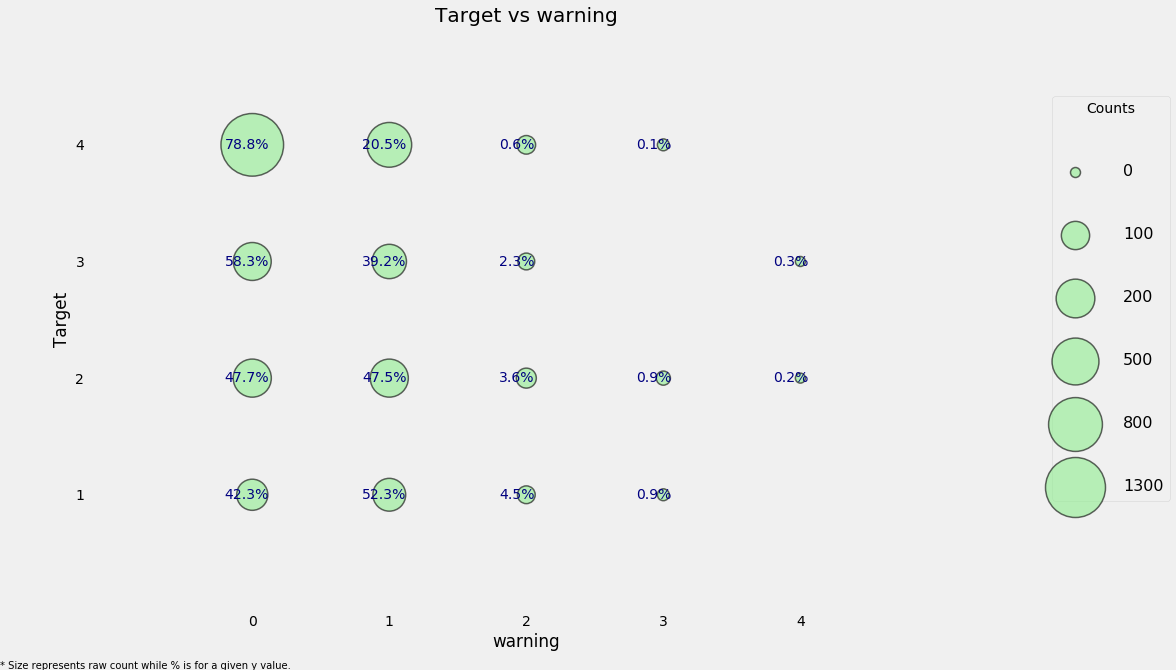

In [289]:
plot_categoricals('warning', 'Target', data = heads)

**bonus**

:  a family gets a point for having a refrigerator, computer, tablet, or television

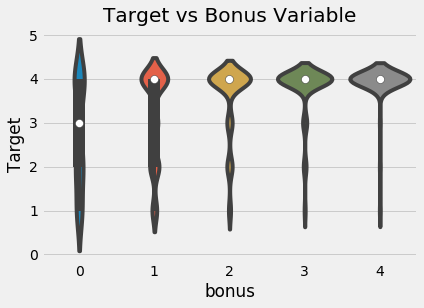

In [290]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])

sns.violinplot('bonus', 'Target', data = heads, figsize = (10, 6));
plt.title('Target vs Bonus Variable');

**Per Capita Features**

: Additional features we can make calculate the number of certain measurements for each person in the household

In [291]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

### 3_2) Exploring Household Variables

we can take a look at them in relation to the Target

#### 3_2_1) Measuring Relationships

1. **Pearson Correlation**(from -1 to 1)

   : measuring the **linear relationship** between two variables
   
   (증가가 정확히 선형인 경우에만 1이 될 수 있다.)

2. **Spearman Correlation**(from -1 to 1)

   : measuring the **monotonic relationship** between two variables
  
  (한 변수가 증가하면 다른 변수가 선형 관계가 아닌 경우에도 1이다.)

In [292]:
from scipy.stats import spearmanr

def plot_corrs(x, y):
   
    # Calculate correlations
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]
    
    # Scatter plot
    data = pd.DataFrame({'x': x, 'y': y})
    plt.figure( figsize = (6, 4))
    sns.regplot('x', 'y', data = data, fit_reg = False);
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');

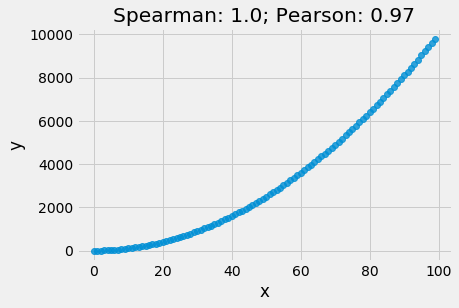

In [293]:
x = np.array(range(100))
y = x ** 2

plot_corrs(x, y)

> Spearman correlation : ordinal variables( Target or the years of education )에 적합

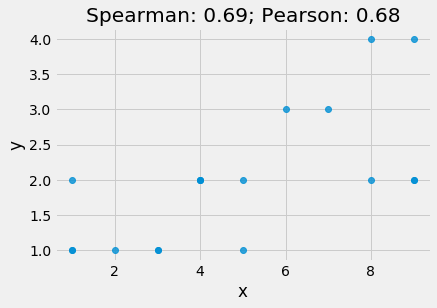

In [294]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

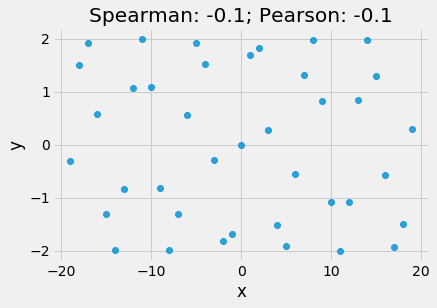

In [295]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)


**Pearson correlation** (모든 변수와 Target간의)

In [296]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


> - **negative correlations**
     - 'warning' 이 증가할 수록 가난 수준도 높아짐
     - 'hogar_nin'(0 - 19세 아이 수) 이 증가할 수록 가난 수준도 높아짐
> - **positive correlations**
     - 'meaneduc'(성인의 평균 교육 수준) : 더 높은 수준의 교육은 일반적으로 낮은 빈곤 수준과 관련이 있다.

- .00-.19 : “very weak”
- .20-.39 : “weak”
- .40-.59 : “moderate”
- .60-.79 : “strong”
- .80-1.0 : “very strong”

**Spearman correlation**

In [297]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

for c in heads:
    # numbers만 가능
    if heads[c].dtype != 'object':
        feats.append(c)
        
        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

**pvalue**
: p-value는 귀무가설이 맞다는 전제 하에, 관측된 통계값 혹은 그 값보다 큰 값이 나올 확률

==> 정리하기!!

In [298]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


In [299]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue      diff
77    rooms-per-capita  0.152185  0.223303  6.521453e-35 -0.071119
85               v18q1  0.197493  0.244200  1.282664e-41 -0.046708
87  tablets-per-capita  0.204638  0.248642  3.951568e-43 -0.044004
2                 r4t1 -0.260917 -0.219226  1.112230e-33 -0.041691
97   phones-per-capita  0.299026  0.337377  4.760104e-80 -0.038351

In [300]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
57    techozinc  0.014357  0.003404  8.528369e-01  0.010954
49  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
88       edjefe  0.235687  0.214736  2.367521e-32  0.020951
66       edjefa  0.052310  0.005114  7.804715e-01  0.047197
17   dependency -0.126465 -0.281516  2.792620e-55  0.155051

> 상관관계에서 가장 큰 차이를 보이는 열은 'dependency'

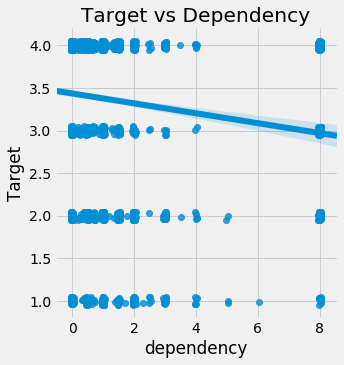

In [301]:
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Dependency');

> 관계를 보기 어렵지만, 약간 음의 관계이다.

> 즉,dependency가 증가할 수록, Target은 감소한다.
- dependency가 증가할 수록 빈곤의 심각성은 증가하는 경향이 있다.
- 더 많은 의존적인 가족(일하지 않는 가족)을 갖는 것은 그들이 의존적이지 않은 가족 구성원들에 의해 지원되어야 하기 때문에 더 높은 수준의 가난으로 나타난다.

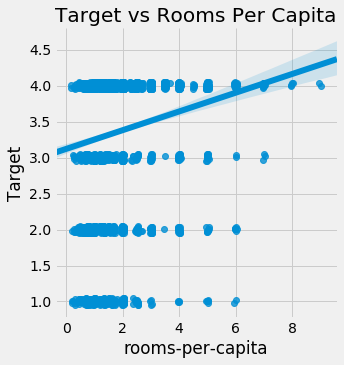

In [302]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Rooms Per Capita');

#### 3_2_2) Correlation Heatmap
7개의 변수들을 뽑아서 Target과의 상관관계를 heatmap으로 보자

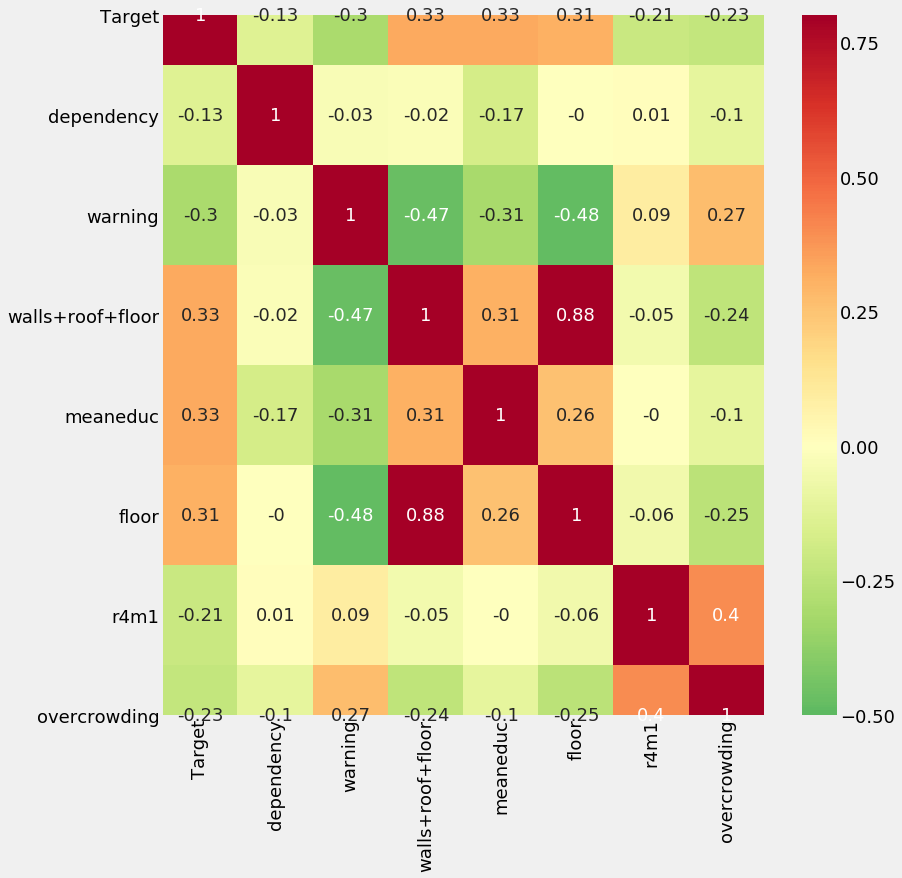

In [303]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

# 상관계수 계산
corr_mat = train_heads[variables].corr().round(2)

# correlation heatmap 그리기
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

> floor , walls+roof+floor : Target과 높은 상관관계 보임

#### 3_2_3) Features Plot

Target과 가장 상관관계가 있는 변수들의 plot을 만들어 보자.
- 위쪽 삼각형 : 산점도(scatterplots )
- 대각선 : kernel density estimate(kde)
- 아래쪽 삼각형 : 2D KDE

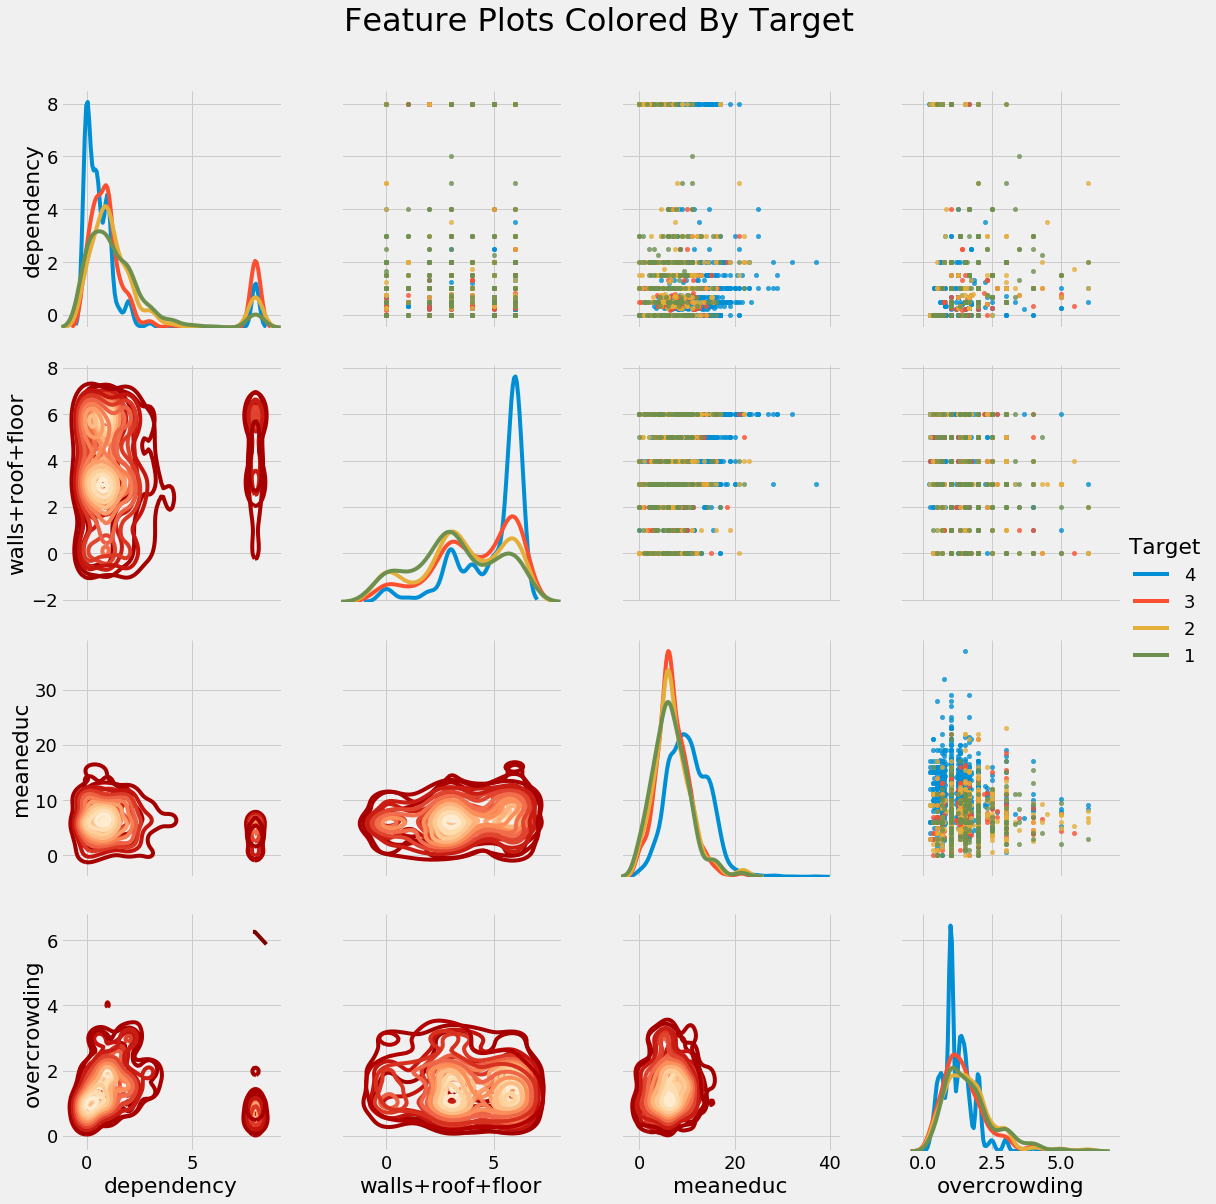

In [304]:
import warnings
warnings.filterwarnings('ignore')

plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor', 'meaneduc', 'overcrowding']]

grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

In [305]:
household_feats = list(heads.columns)

## 4) Individual Level Variables
두 종류의 individual level variables
-  Boolean (1 or 0 for True or False)
- ordinal (discrete values with a meaningful ordering)

In [306]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

### 4_1) 중복된 Individual Variables 처리 및 새로운 열 생성

In [307]:
corr_matrix = ind.corr()

# 상삼각행렬 선택
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관계수가 0.95보다 큰 index 뽑기
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [308]:
ind = ind.drop(columns = 'male')

**Creating Ordinal Variables**

instlevel_  : 개인의 교육 수준

  - instlevel1 : =1 no level of education
  - instlevel2 : =1 incomplete primary
  - instlevel3 : =1 complete primary
  - instlevel4 : =1 incomplete academic secondary level
  - instlevel5 : =1 complete academic secondary level
  - instlevel6 : =1 incomplete technical secondary level
  - instlevel7 : =1 complete technical secondary level
  - instlevel8 : =1 undergraduate and higher education
  - instlevel9 : =1 postgraduate higher education

ordinal variable를 만들기 위해 각 개인에 대해 어떤 열이 0이 아닌지를 찾을 것이다.

In [309]:
ind[[c for c in ind if c.startswith('instl')]].head()

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

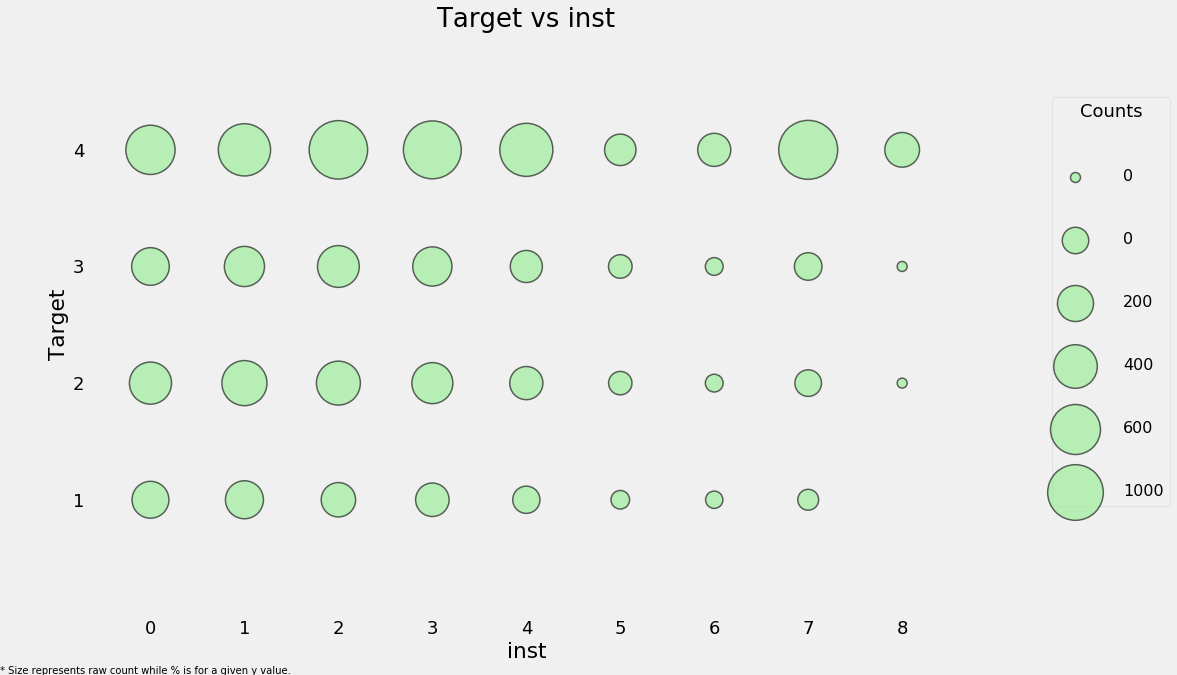

In [310]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

plot_categoricals('inst', 'Target', ind, annotate = False);

> 교육 수준이 높을수록 빈곤 수준이 낮아지는 것 같다. 하지만 우리는 이것이 개별적인 수준이라는 것을 명심할 필요가 있고 우리는 결국 가계 수준에서 이 데이터를 통합해야 할 것이다.

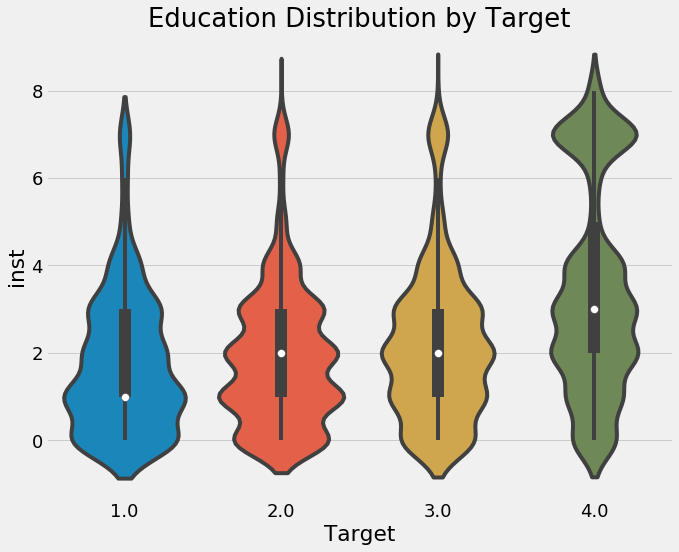

In [311]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'Target', y = 'inst', data = ind);
plt.title('Education Distribution by Target');

In [312]:
# Drop the education columns
# ind = ind.drop(columns = [c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 40)

### Feature Construction

기존 데이터를 사용하여 features들을 만들 수 있다.

예를 들어,학교 교육의 연도를 연령별로 나눌 수 있다.

- 'escolari' : years of schooling

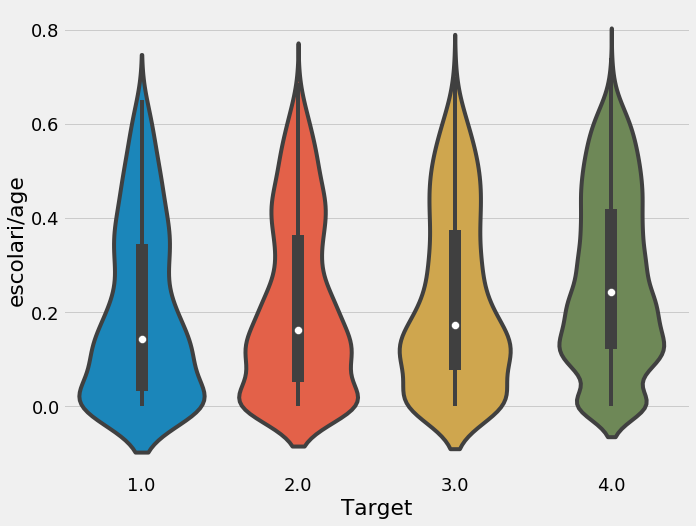

In [313]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize = (10, 8))
sns.violinplot('Target', 'escolari/age', data = ind);

- inst : 개인의 교육 수준
- tech : 태블릿과 휴대전화의 조합을 나타낸다.

In [314]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

## 5) Feature Engineering through Aggregations 

individual data를 household data에 통합하려면 가구별로 집계해야 한다.
- idhogar별로 groupby해서 진행한다. 
- 순서형 또는 연속형 변수에 대한 집계를 위해, 우리는 6개의 변수를 사용할 수 있고, 그 중 5개는 pandas에 내장되어 있으며, 그 중 하나는 우리가 range_로 정의하는 것이다.

In [315]:
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

In [316]:
# Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count   dis-std  dis-range_  \
idhogar                                                                 
000a08204        0        0        0          3  0.000000           0   
000bce7c4        0        1        1          2  0.707107           1   
001845fb0        0        0        0          4  0.000000           0   
001ff74ca        0        0        0          2  0.000000           0   
003123ec2        0        0        0          4  0.000000           0   

           female-min  female-max  female-sum  female-count  female-std  \
idhogar                                                                   
000a08204           0           1           1             3    0.577350   
000bce7c4           0           1           1             2    0.707107   
001845fb0           0           1           2             4    0.577350   
001ff74ca           1           1           2             2    0.000000   
003123ec2           0           1           1             4    0.500000   

           female-range_  estadocivil1-min  estadocivil1-max  \
idhogar                                                        
000a08204              1                 0                 1   
000bce7c4              1                 0                 0   
001845fb0              1                 0                 0   
001ff74ca              0                 0                 1   
003123ec2              1                 0                 1   

           estadocivil1-sum  estadocivil1-count  estadocivil1-std  \
idhogar                                                             
000a08204                 1                   3          0.577350   
000bce7c4                 0                   2          0.000000   
001845fb0                 0                   4          0.000000   
001ff74ca                 1                   2          0.707107   
003123ec2                 2                   4          0.577350   

           estadocivil1-range_  estadocivil2-min  estadocivil2-max  \
idhogar                                                              
000a08204                    1                 0                 1   
000bce7c4                    0                 0                 0   
001845fb0                    0                 0                 1   
001ff74ca                    1                 0                 0   
003123ec2                    1                 0                 1   

           estadocivil2-sum  estadocivil2-count  estadocivil2-std  \
idhogar                                                             
000a08204                 2                   3           0.57735   
000bce7c4                 0                   2           0.00000   
001845fb0                 2                   4           0.57735   
001ff74ca                 0                   2           0.00000   
003123ec2                 2                   4           0.57735   

           estadocivil2-range_  estadocivil3-min  estadocivil3-max  \
idhogar                                                              
000a08204                    1                 0                 0   
000bce7c4                    0                 1                 1   
001845fb0                    1                 0                 0   
001ff74ca                    0                 0                 0   
003123ec2                    1                 0                 0   

           estadocivil3-sum

In [317]:
ind_agg.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9]].head()

v18q-min  v18q-max  v18q-sum  v18q-count  dis-min  dis-max  \
idhogar                                                                 
000a08204         1         1         3           3        0        0   
000bce7c4         0         0         0           2        0        1   
001845fb0         0         0         0           4        0        0   
001ff74ca         1         1         2           2        0        0   
003123ec2         0         0         0           4        0        0   

           dis-sum  dis-count  
idhogar                        
000a08204        0          3  
000bce7c4        1          2  
001845fb0        0          4  
001ff74ca        0          2  
003123ec2        0          4

#### Feature Selection

In [318]:
corr_matrix = ind_agg.corr()

# 상삼각행렬 선택
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
# 상관관계가 0.95보다 큰 변수 쌍 중 하나를 제거
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


In [319]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 228)


In [320]:
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
3            0          0            0         0         0          0   
4            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer  pisoother  pisonatur  pisonotiene  \
0            0           0           1          0          0            0   
1            0           0           0          0          0            0   
2            0           0           1          0          0            0   
3            0           0           1          0          0            0   
4            0           0           1          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
0                1               0            0       1        0       0   
1                1               0            0       1        0       0   
2                1               0            0       1        0       0   
3                1               0            0       1        0       0   
4                1               0            0       1        0       0   

   coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
0        0           0           1           0           0           0   
1        0           0           1           0           0           0   
2        0           0           1           0           0           0   
3        0           0           1           0           0           0   
4        0           0           1           0           0           0   

   energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
0              0              0              1              0          1   
1              0              1              0              0          1   
2              0              1              0              0          1   
3              0              1              0              0          1   
4              0              0              1              0          1   

   elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  \
0          0          0          0          0          0        0        1   
1          0          0          0          0          0        0        1   
2          0          0          0          0          0        0        1   
3          0          0          0          0          0        0        0   
4          0          0          0          0          0        1        0   

   epared3  eviv1  eviv2  eviv3  tipovivi1  tipovivi2  tipovivi3  tipovivi4  \
0        0      1      0      0          0          0          1          0   
1        0      0      1      0          0          0          1          0   
2        0      0      0      1          1          0          0          0   
3        1      0

#### Final Data Exploration

In [321]:
corrs = final.corr()['Target']

In [322]:
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [323]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

> 만든 변수들 중 일부는 Target과 매우 관련이 있다는 것을 알 수 있다. 이러한 변수가 실제로 유용한지는 모델링 단계에서 결정될 것이다.

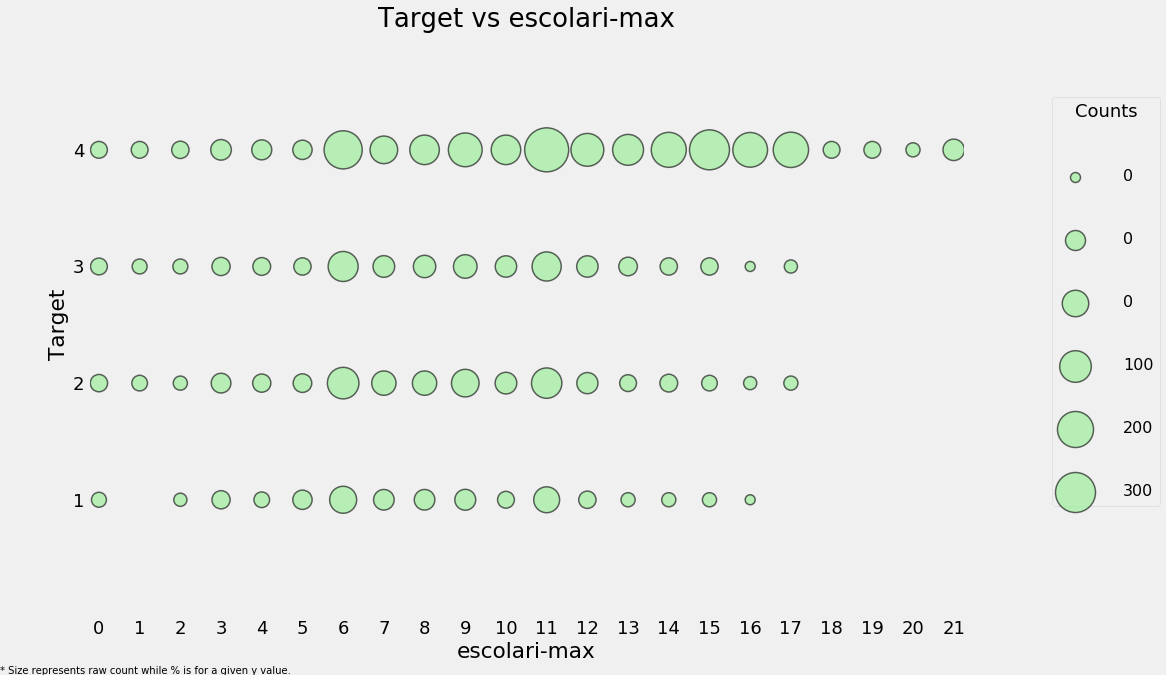

In [324]:
plot_categoricals('escolari-max', 'Target', final, annotate=False);

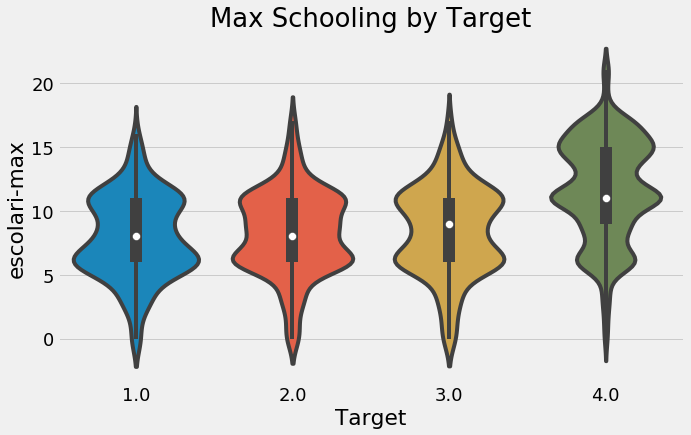

In [325]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

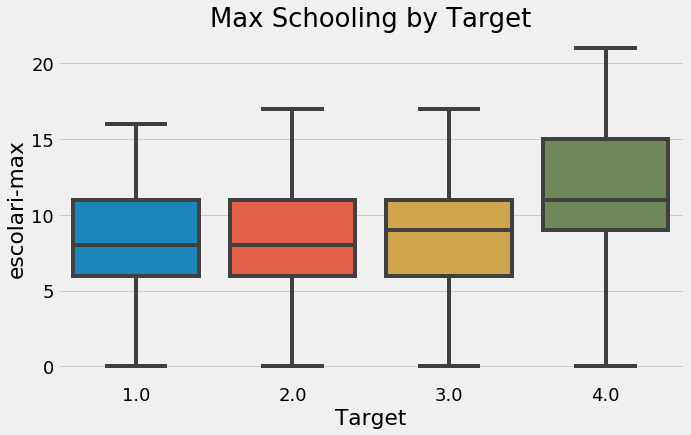

In [326]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

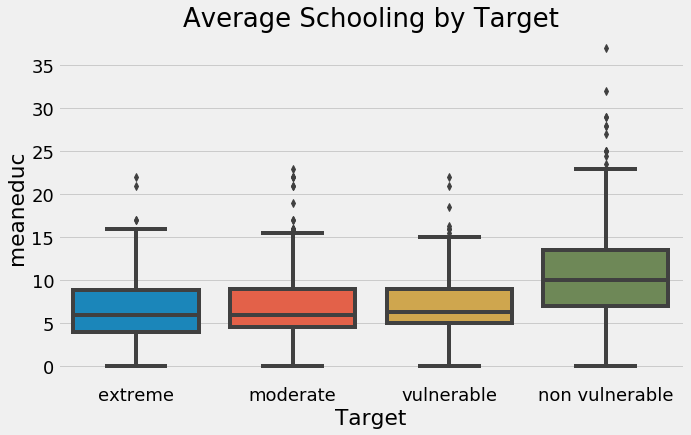

In [327]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Average Schooling by Target');

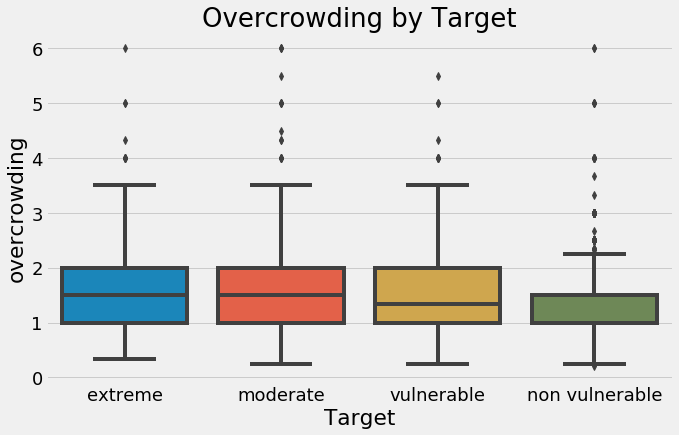

In [328]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'overcrowding', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Overcrowding by Target');

유용할 수 있는 또 다른 feature는 가장의 성별이다.

==> data를 합쳤으므로 individual level data로 돌아가서 가장의 성별을 찾아야 할 것이다.

In [329]:
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female': 'female-head'})

In [330]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

> 가장이 여성인 가정이 빈곤의 정도가 약간 더 심한 것 같다.

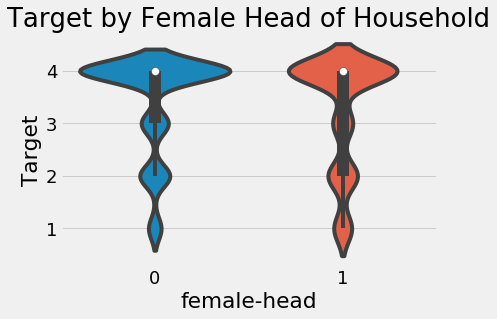

In [331]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

> 또한, 여성 가장이 있는지 없는지를 통해 평균 교육의 차이를 살펴볼 수 있다

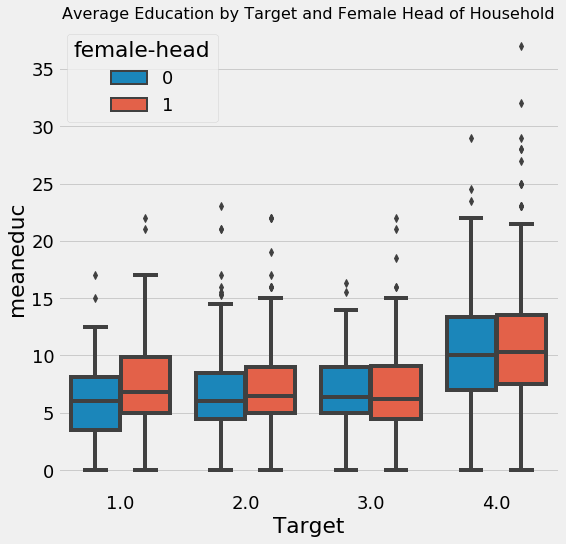

In [332]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);

> 위 그림은 Target의 모든 값에서, 여성 가장를 가진 가정이 더 높은 수준의 교육을 받는 것처럼 보인다. 그러나 우리는 전반적으로 여성 가장을 가진 가정이 심각한 빈곤을 겪을 가능성이 높다는 것을 보았다.

In [333]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

> 전반적으로, 여성 가장이 있는 가정의 평균 교육은 남성 가장이 있는 가정보다 약간 높다. 

# 6. Machine Learning Modeling

- 모델링 과정에는 Random Forest Classifier를 사용하고 Gradient Boosting Machine을 포함한 몇 가지 다른 모델을 시도해 볼 것이다.
- 모델을 평가하기 위해, 우리는 train data에 10-fold cross validation을 사용할 것이다.
- 성능을 평가하기 위해, F1 Macro를 사용할 것이다. 

In [334]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [335]:
# Labels for training
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))


train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

# Submission base which is used for making submissions to the competition
submission_base = test[['Id', 'idhogar']].copy()

> 서로 다른 모델을 비교하기 때문에, 피쳐 스케일링을 해야 한다.(각 컬럼의 범위를 0과 1 사이로 제한). 많은 앙상블 모델의 경우 이것은 필요하지 않지만 KNearest Neighbors 또는 Support Vector Machine과 같이 거리 측정값에 의존하는 모델을 사용할 경우 필요하다.

In [336]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')),('scaler', MinMaxScaler())])

train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

C:\Users\lsl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [337]:
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs = -1)

# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3439 with std = 0.0313


## 1) Feature Importances*

In [338]:
model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000643
1       hacapo    0.000283
2         v14a    0.000460
3       refrig    0.001798
4  paredblolad    0.006024

'아래 함수 정의'
- Args
   -  df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".

   - n (int): Number of most important features to plot. Default is 15.

   - threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
    
- Returns
   - df (dataframe): Dataframe ordered by feature importances with a **normalized column** (sums to 1)and a cumulative(누적) importance column
    
- Note
    * Normalization in this case means sums to 1. 
    * Cumulative(누적) importance is calculated by summing features from most to least important
    * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative(누적) importance

In [339]:
def plot_feature_importances(df, n = 10, threshold = None):
    
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative(누적) importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative(누적) importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

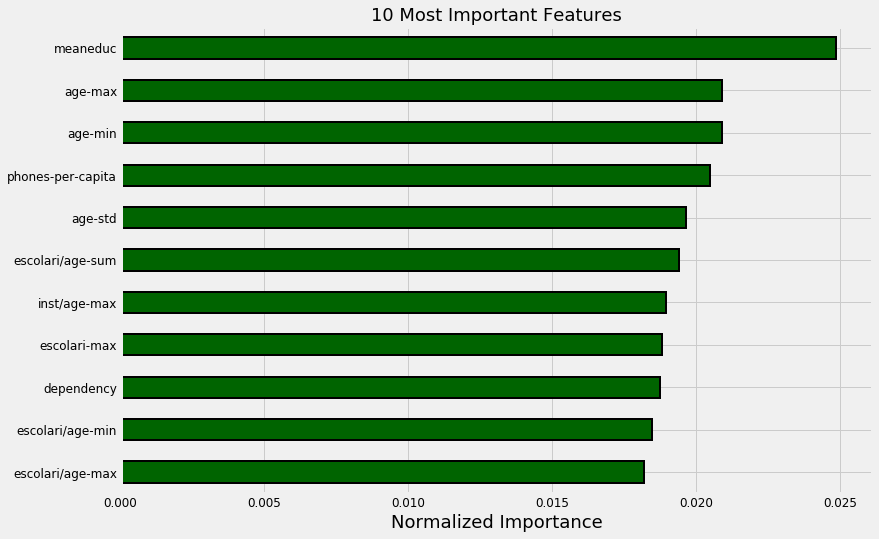

132 features required for 95% of cumulative importance.


In [340]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

In [341]:
# Plots the distribution of `variable` in `df` colored by the `Target` column
    
def kde_target(df, variable):
    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}
    plt.figure(figsize = (12, 8))
    df = df[df['Target'].notnull()]
    
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Poverty Level: {level}', 
                    color = colors[int(subset['Target'].unique())])

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

In [342]:
kde_target(final, 'meaneduc')

In [343]:
kde_target(final, 'escolari/age-range_')

## 2) Model Selection*

In [344]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [345]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# 경고 메세지 숨기기
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])


# Perform 10 fold cross validation of a model
def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [346]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.28346 with std: 0.04484


> 모델의 정확도가 약 28%일 것으로 기대

In [347]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.17935 with std: 0.03867


In [348]:
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.3044 with std: 0.04096


In [349]:
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.32217 with std: 0.05984


In [350]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.27896 with std: 0.03675


In [351]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.35078 with std: 0.03829

KNN with 10 neighbors

10 Fold CV Score: 0.32153 with std: 0.03028

KNN with 20 neighbors

10 Fold CV Score: 0.31039 with std: 0.04974


In [352]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.32215 with std: 0.04671


## 3) Comparing Model Performance

In [353]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.34386 with std: 0.03134


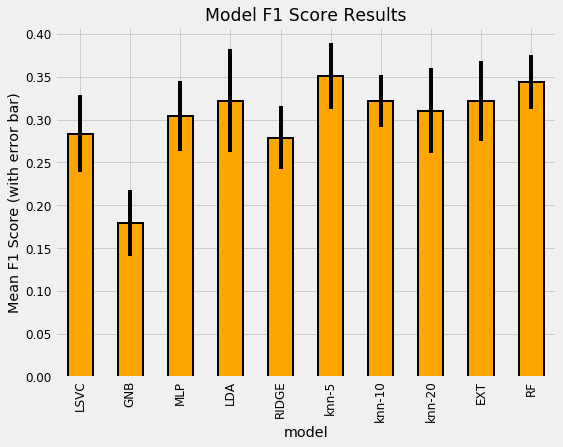

In [354]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

# 7. Making a Submission

In [355]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

In [356]:
def submit(model, train, train_labels, test, test_ids):
    
    # Train on the data
    model.fit(train, train_labels)
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar': test_ids,
                               'Target': predictions})

     # Make a submission dataframe
    submission = submission_base.merge(predictions, 
                                       on = 'idhogar',
                                       how = 'left').drop(columns = ['idhogar'])
    
    # Fill in households missing a head
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)

    return submission 

In [357]:
rf_submission = submit(RandomForestClassifier(n_estimators = 100, 
                                              random_state=10, n_jobs = -1), 
                         train_set, train_labels, test_set, test_ids)

# rf_submission.to_csv('rf_submission.csv', index = False)

# 8. Feature Selection*

In [358]:
train_set = pd.DataFrame(train_set, columns = features)

corr_matrix = train_set.corr()

# 상삼각행렬 선택하고
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 상관계수가 0.95보다 큰 index 뽑기
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'elec', 'v18q-count', 'female-sum']

In [359]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(2973, 222)

In [360]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

In [361]:
from sklearn.feature_selection import RFECV

# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# Create the object
selector = RFECV(estimator, step = 1, cv = 3, scoring= scorer, n_jobs = -1)

In [362]:
selector.fit(train_set, train_labels)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=10,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=-1,
      scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

58

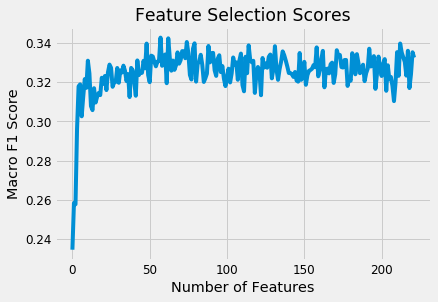

In [363]:
plt.plot(selector.grid_scores_);

plt.xlabel('Number of Features'); plt.ylabel('Macro F1 Score'); plt.title('Feature Selection Scores');
selector.n_features_

In [364]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

feature  rank
73               r4h2     1
173    instlevel3-std     1
130  estadocivil7-std     1
129  estadocivil7-sum     1
198      escolari-sum     1
197      escolari-max     1
86           bedrooms     1
177    instlevel4-std     1
109        female-std     1
187    instlevel8-sum     1

In [ ]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)
train_selected

In [366]:
selected_features = train_set.columns[np.where(selector.ranking_==1)]

train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [367]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.36248 with std: 0.0529


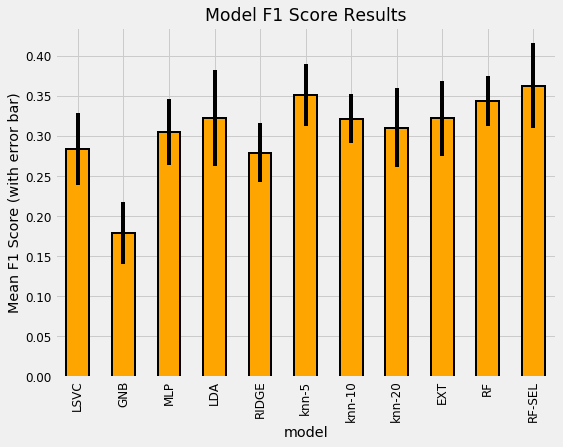

In [368]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

# 9. Upgrading Our Model

## 1) Gradient Boosting Machine

In [369]:
def macro_f1_score(labels, predictions):
    # Reshape the predictions as needed
    predictions = predictions.reshape(len(np.unique(labels)), -1 ).argmax(axis = 0)
    
    metric_value = f1_score(labels, predictions, average = 'macro')
    
    # Return is name, value, is_higher_better
    return 'macro_f1', metric_value, True

## 2) Light Gradient Boosting Machine Implementation

In [ ]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids, 
              nfolds = 5, return_preds = False, hyp = None):
    """Model using the GBM and cross validation.
       Trains with early stopping on each fold.
       Hyperparameters probably need to be tuned."""
    
    feature_names = list(features.columns)

    # Option for user specified hyperparameters
    if hyp is not None:
        # Using early stopping so do not need number of esimators
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        # Model hyperparameters
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    # Build the model
    model = lgb.LGBMClassifier(**params, objective = 'multiclass', 
                               n_jobs = -1, n_estimators = 10000,
                               random_state = 10)
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Hold all the predictions from each fold
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))
    
    # Convert to arrays for indexing
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))
    
    valid_scores = []
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Dataframe for fold predictions
        fold_predictions = pd.DataFrame()
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)
        
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        # Make predictions from the fold as probabilities
        fold_probabilitites = model.predict_proba(test_features)
        
        # Record each prediction for each class as a separate column
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        # Add needed information for predictions 
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        # Add the predictions as new rows to the existing predictions
        predictions = predictions.append(fold_predictions)
        

In [ ]:
        # Feature importances
        importances += model.feature_importances_ / nfolds  ########## ????????????????????????????????????? 
        

In [370]:
        # Display fold information
        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # Feature importances dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    # If we want to examine predictions don't average over folds
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances
    
    # Average the predictions over folds
    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    # Find the class and associated probability
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    
    # Merge with the base to have one prediction for each individual
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    # Fill in the individuals that do not have a head of household with 4 since these will not be scored
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # return the submission and feature importances along with validation scores
    return submission, feature_importances, valid_scores

In [371]:
%%capture --no-display
predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)

'Fold 1, Validation Score: 0.4394, Estimators Trained: 0'

'Fold 2, Validation Score: 0.36373, Estimators Trained: 0'

'Fold 3, Validation Score: 0.40204, Estimators Trained: 0'

'Fold 4, Validation Score: 0.41555, Estimators Trained: 0'

'Fold 5, Validation Score: 0.38524, Estimators Trained: 0'

'5 cross validation score: 0.40119 with std: 0.02579.'

In [372]:
predictions.head()

1         2         3         4    idhogar  fold  Target  confidence
0  0.001094  0.000647  0.002495  0.995764  72958b30c     1       4    0.995764
1  0.067259  0.006502  0.001764  0.924475  5b598fbc9     1       4    0.924475
2  0.009100  0.081916  0.050314  0.858669  1e2fc704e     1       4    0.858669
3  0.000286  0.000765  0.000342  0.998607  8ee7365a8     1       4    0.998607
4  0.008554  0.010072  0.007115  0.974259  ff69a6fc8     1       4    0.974259

In [373]:
plt.rcParams['font.size'] = 18

# Kdeplot
g = sns.FacetGrid(predictions, row = 'fold', hue = 'Target', size = 3, aspect = 4)
g.map(sns.kdeplot, 'confidence');
g.add_legend();

plt.suptitle('Distribution of Confidence by Fold and Target', y = 1.05);

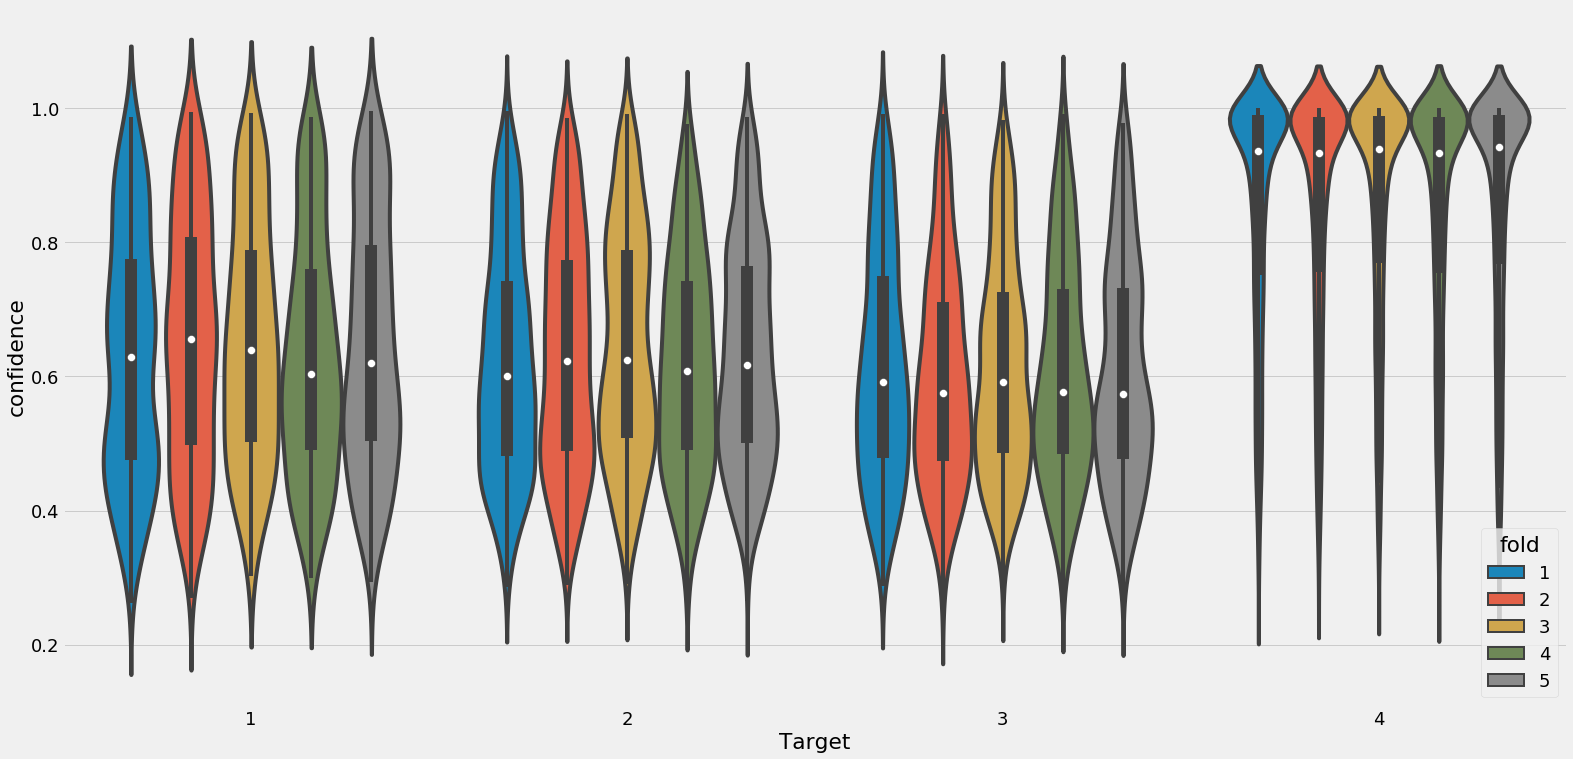

In [374]:
plt.figure(figsize = (24, 12))
sns.violinplot(x = 'Target', y = 'confidence', hue = 'fold', data = predictions);

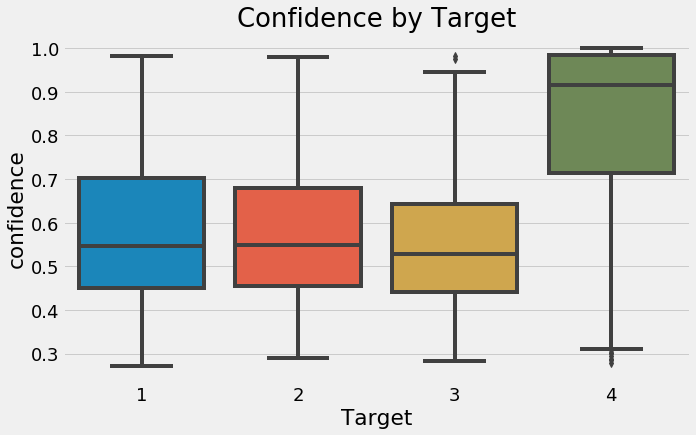

In [375]:
# Average the predictions over folds
predictions = predictions.groupby('idhogar', as_index = False).mean()

# Find the class and associated probability
predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
predictions = predictions.drop(columns = ['fold'])

# Plot the confidence by each target
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'confidence', data = predictions);
plt.title('Confidence by Target');

plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'confidence', data = predictions);
plt.title('Confidence by Target');

In [376]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, 
                                             test_set, test_ids, return_preds=False)

submission.to_csv('gbm_baseline.csv')

KeyboardInterrupt: 

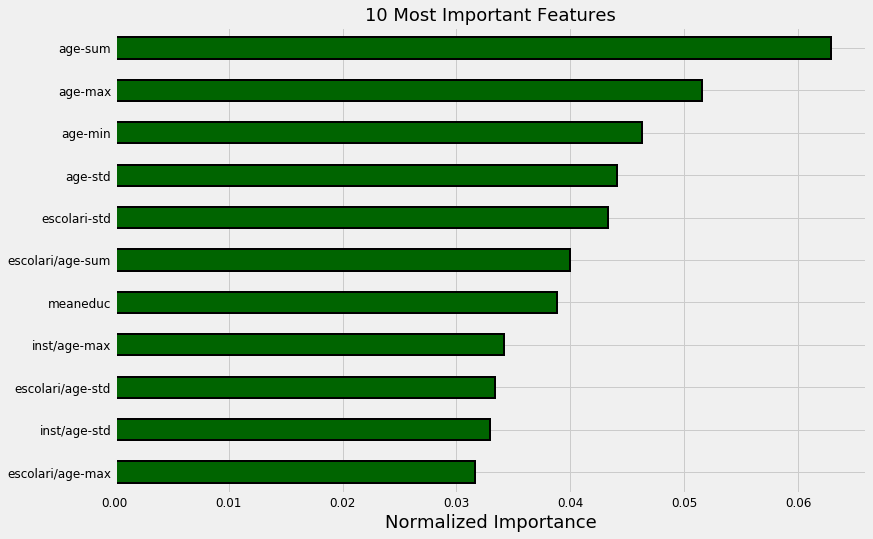

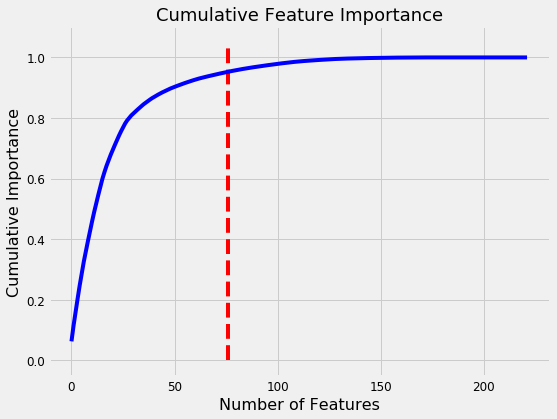

76 features required for 95% of cumulative importance.


In [377]:
_ = plot_feature_importances(gbm_fi, threshold=0.95)

In [ ]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, 
                                                               test_selected, test_ids)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM", "GBM_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                                sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, 
                                             nfolds=10, return_preds=False)

In [ ]:
submission.to_csv('gbm_10fold.csv', index = False)

In [ ]:
%%capture
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids,
                                                               nfolds=10)

In [ ]:
submission.to_csv('gmb_10fold_selected.csv', index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_10Fold", "GBM_10Fold_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                    sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6), 
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [ ]:
print(f"There are {gbm_fi_selected[gbm_fi_selected['importance'] == 0].shape[0]} features with no importance.")

# 10. Model Optimization*
1. Manual
2. Grid Search
3. Random Search
4. Automated Optimizatio

Model Tuning with Hyperopt


In [ ]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample

In [ ]:
import csv
import ast
from timeit import default_timer as timer

## 1) Objective Function

In [ ]:
def objective(hyperparameters, nfolds=5):
    """Return validation score from hyperparameters for LightGBM"""
    
    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # Retrieve the subsample
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)
    
    boosting_type = hyperparameters['boosting_type']['boosting_type']
    
    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']
    
    # Subsample and subsample frequency to top level keys
    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type
    
    # Whether or not to use limit maximum depth
    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin', 
                           'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Convert to arrays for indexing
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1 ))
    
    valid_scores = []
    best_estimators = []
    run_times = []
    
    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced',
                               n_jobs=-1, metric = 'None',
                               n_estimators=10000)
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        start = timer()
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score, 
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 400)
        end = timer()
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        best_estimators.append(model.best_iteration_)
        
        run_times.append(end - start)
    
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score
    
    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)
    
    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators
    
    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()
    
    # Display progress
    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score: {round(score, 4)}.')
    
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'time': run_time, 'time_std': run_time_std, 'status': STATUS_OK, 
            'score': score, 'score_std': score_std}

## 2) Search Space

In [ ]:
space = {
    'boosting_type': hp.choice('boosting_type', 
                              [{'boosting_type': 'gbdt', 
                                'subsample': hp.uniform('gdbt_subsample', 0.5, 1),
                                'subsample_freq': hp.quniform('gbdt_subsample_freq', 1, 10, 1)}, 
                               {'boosting_type': 'dart', 
                                 'subsample': hp.uniform('dart_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('dart_subsample_freq', 1, 10, 1),
                                 'drop_rate': hp.uniform('dart_drop_rate', 0.1, 0.5)},
                                {'boosting_type': 'goss',
                                 'subsample': 1.0,
                                 'subsample_freq': 0}]),
    'limit_max_depth': hp.choice('limit_max_depth', [True, False]),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', 
                                   np.log(0.025), 
                                   np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 2000, 100000, 2000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 80, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.5, 1.0)
}
sample(space)

## 3) Algorithm

In [ ]:
algo = tpe.suggest

## 4) Results History

In [ ]:
trials = Trials()

# Create a file and open a connection
OUT_FILE = 'optimization.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

MAX_EVALS = 100
PROGRESS = 10
N_FOLDS = 5
ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score', 'std']
writer.writerow(headers)
of_connection.close()

In [ ]:
%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)

In [ ]:
import json

# Save the trial results
with open('trials.json', 'w') as f:
    f.write(json.dumps(str(trials)))

## 5) Using Optimized Model

In [ ]:
results = pd.read_csv(OUT_FILE).sort_values('loss', ascending = True).reset_index()
results.head()

In [ ]:
plt.figure(figsize = (8, 6))
sns.regplot('iteration', 'score', data = results);
plt.title("Optimization Scores");
plt.xticks(list(range(1, results['iteration'].max() + 1, 3)));

In [ ]:
best_hyp = ast.literal_eval(results.loc[0, 'hyperparameters'])
best_hyp

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_selected, train_labels, 
                                             test_selected, test_ids, 
                                             nfolds = 10, return_preds=False)

model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_SEL"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True).sort_values('cv_mean', ascending = False)

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, 
                                             test_set, test_ids, 
                                             nfolds = 10, return_preds=False)

model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True).sort_values('cv_mean', ascending = False)

In [ ]:
model_results.head()

In [ ]:
# submission.to_csv('gbm_opt_10fold_selected.csv', index = False)

In [ ]:
_ = plot_feature_importances(gbm_fi)

# 11. Investigate Predictions

In [ ]:
preds = submission_base.merge(submission, on = 'Id', how = 'left')
preds = pd.DataFrame(preds.groupby('idhogar')['Target'].mean())

# Plot the training labels distribution
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 6))
heads['Target'].sort_index().plot.hist(normed = True,
                                       edgecolor = r'k',
                                       linewidth = 2,
                                       ax = axes[0])

axes[0].set_xticks([1, 2, 3, 4]);
axes[0].set_xticklabels(poverty_mapping.values(), rotation = 60)
axes[0].set_title('Train Label Distribution')

# Plot the predicted labels
preds['Target'].sort_index().plot.hist(normed = True, 
                                       edgecolor = 'k',
                                       linewidth = 2,
                                       ax = axes[1])
axes[1].set_xticks([1, 2, 3, 4]);
axes[1].set_xticklabels(poverty_mapping.values(), rotation = 60)
plt.subplots_adjust()
plt.title('Predicted Label Distribution');

In [ ]:
heads['Target'].value_counts()

In [ ]:
preds['Target'].value_counts()

# 12. Validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split into validation set
X_train, X_valid, y_train, y_valid = train_test_split(train_selected,
                                                      train_labels,
                                                      test_size = 1000,
                                                      random_state = 10)

# Create model and train
model = lgb.LGBMClassifier(**best_hyp, 
                           class_weight = 'balanced',
                           random_state = 10)
model.fit(X_train, y_train);

In [ ]:
valid_preds = model.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = [1, 2, 3, 4])

# Convert into predictions
preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis = 1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis = 1)

preds_df.head()

In [ ]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average = 'macro'), 5))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [ ]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

In [ ]:
plot_confusion_matrix(cm, normalize = True,
                      classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

# 13. Dimension Reduction

In [ ]:
from umap import UMAP
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

n_components = 3

umap = UMAP(n_components=n_components)
pca = PCA(n_components=n_components)
ica = FastICA(n_components=n_components)
tsne = TSNE(n_components=n_components)

In [ ]:
train_df = train_selected.copy()
test_df = test_selected.copy()

for method, name in zip([umap, pca, ica, tsne], 
                        ['umap', 'pca', 'ica', 'tsne']):
    
    # TSNE has no transform method
    if name == 'tsne':
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()
    
    else:
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()
        
        test_reduction = method.transform(test_selected)
    
        # Add components to test data
        test_df['%s_c1' % name] = test_reduction[:, 0]
        test_df['%s_c2' % name] = test_reduction[:, 1]
        test_df['%s_c3' % name] = test_reduction[:, 2]

    # Add components to training data for visualization and modeling
    train_df['%s_c1' % name] = reduction[:, 0]
    train_df['%s_c2' % name] = reduction[:, 1]
    train_df['%s_c3' % name] = reduction[:, 2]
    
    print(f'Method: {name} {round(end - start, 2)} seconds elapsed.')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map
    Source: https://gist.github.com/jakevdp/91077b0cae40f8f8244a"""

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

cmap = discrete_cmap(4, base_cmap = plt.cm.RdYlBu)

train_df['label'] = train_labels

In [ ]:
# Plot each method
for method, name in zip([umap, pca, ica, tsne], 
                        ['umap', 'pca', 'ica', 'tsne']):
    
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    p = ax.scatter(train_df['%s_c1' % name], train_df['%s_c2'  % name], train_df['%s_c3'  % name], 
                   c = train_df['label'].astype(int), cmap = cmap)
    
    plt.title(f'{name.capitalize()}', size = 22)
    fig.colorbar(p, aspect = 4, ticks = [1, 2, 3, 4])

In [ ]:
train_df, test_df = train_df.align(test_df, axis = 1, join = 'inner')

In [ ]:
%%capture

submission, gbm_fi, valid_scores = model_gbm(train_df, train_labels, 
                                             test_df, test_ids, nfolds = 10,
                                             hyp = best_hyp)

In [ ]:
# submission.to_csv('gbm_opt_10fold_dr.csv', index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_DR"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True)

In [ ]:
model_results = model_results.sort_values('cv_mean')
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (10, 8),
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [ ]:
_ = plot_feature_importances(gbm_fi)

# 14. Visualize Single Decision Tree

In [ ]:
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_limited = model.estimators_[5]
estimator_limited

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = train_selected.columns,
                class_names = ['extreme', 'moderate' , 'vulnerable', 'non-vulnerable'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
!dot -Tpng tree_limited.dot -o tree_limited.png

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [ ]:
# No maximum depth
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_nonlimited = model.estimators_[5]

export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = train_selected.columns,
                class_names = ['extreme', 'moderate' , 'vulnerable', 'non-vulnerable'],
                rounded = True, proportion = False, precision = 2)

!dot -Tpng tree_nonlimited.dot -o tree_nonlimited.png -Gdpi=600

In [ ]:
Image(filename = 'tree_nonlimited.png')